In [ ]:
#Please make sure to install this package before proceeding

# Tweets.csv : https://www.kaggle.com/datasets/yasserh/twitter-tweets-sentiment-dataset
# text_emotions.csv : https://data.world/crowdflower/sentiment-analysis-in-text
# Twitter_date.csv : https://www.kaggle.com/code/nkenyor/twitter-sentiment-analysis
#Load, import, download all dependencies

main_text = 'clean_text'

!pip install pyspellchecker
from google.colab import drive
import pandas as pd
import string
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

# Stemming/Lemmatizing Libraries
from nltk.stem.porter import PorterStemmer
from nltk.stem.snowball import SnowballStemmer
from nltk.stem import LancasterStemmer

# Other text analysis dependencies
from spellchecker import SpellChecker
from textblob import TextBlob
from nltk.tokenize import word_tokenize
from nltk import pos_tag, ne_chunk
import spacy
from spacy import displacy

# Initiating packages and libraries
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('words')
nltk.download('maxent_ne_chunker')
spacy.cli.download("en_core_web_sm")
sp = spacy.load("en_core_web_sm")
pd.options.mode.chained_assignment = None
ENGLISH_WORDS = set(nltk.corpus.words.words()) #Pre load english words to optimize the app performance

'''
Chat Words Conversion
'''
chat_words_str = """
AFAIK=As Far As I Know
AFK=Away From Keyboard
ASAP=As Soon As Possible
ATK=At The Keyboard
ATM=At The Moment
A3=Anytime, Anywhere, Anyplace
B=Be
BAK=Back At Keyboard
BBL=Be Back Later
BBS=Be Back Soon
BFN=Bye For Now
Bih=Birth
BIHDAY= Birthday
B4N=Bye For Now
BRB=Be Right Back
BRT=Be Right There
BTW=By The Way
B4=Before
B4N=Bye For Now
BDAY=Birthday
BC=Because
CU=See You
CUL8R=See You Later
CYA=See You
FAQ=Frequently Asked Questions
FC=Fingers Crossed
FWIW=For What It's Worth
FYI=For Your Information
GAL=Get A Life
GG=Good Game
GN=Good Night
GMTA=Great Minds Think Alike
GR8=Great!
G9=Genius
I'M=I am
IC=I See
ICQ=I Seek you (also a chat program)
ILU=ILU: I Love You
IMHO=In My Honest/Humble Opinion
IMO=In My Opinion
IOW=In Other Words
IRL=In Real Life
KISS=Keep It Simple, Stupid
H3LL=Hell
LDR=Long Distance Relationship
LMAO=Laugh My A.. Off
LOL=Laughing Out Loud
LTNS=Long Time No See
L8R=Later
MTE=My Thoughts Exactly
M8=Mate
NRN=No Reply Necessary
N=In
OIC=Oh I See
OMG=Oh My God
PITA=Pain In The A..
PRT=Party
PRW=Parents Are Watching
R=Are
ROFL=Rolling On The Floor Laughing
ROFLOL=Rolling On The Floor Laughing Out Loud
ROTFLMAO=Rolling On The Floor Laughing My A.. Off
SK8=Skate
STATS=Your sex and age
ASL=Age, Sex, Location
TY=Thank You
THX=Thank You
TTFN=Ta-Ta For Now!
TTYL=Talk To You Later
U=You
UR=Your
U2=You Too
U4E=Yours For Ever
WB=Welcome Back
WTF=What The F...
WTG=Way To Go!
WUF=Where Are You From?
W8=Wait...
7K=Sick:-D Laugher
XOXO=Hugs and kisses
<3=love
****=Shit
*****=Bitch
"""

chat_words_map_dict = {}
chat_words_list = []
for line in chat_words_str.split("\n"):
    if line != "":
        cw = line.split("=")[0]
        cw_expanded = line.split("=")[1]
        chat_words_list.append(cw)
        chat_words_map_dict[cw] = cw_expanded
chat_words_list = set(chat_words_list)


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 15.3 MB/s eta 0:00:00


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping chunkers/maxent_ne_chunker.zip.


✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [ ]:
# Load the Dataset
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/NLP/Project/Tweets.csv')
#df=df.replace(-1,0)
#df.drop(df[df['sentiment'] == 'neutral'].index, inplace=True)
df.head()

textID                                               text  \
0  cb774db0d1                I`d have responded, if I were going   
1  549e992a42      Sooo SAD I will miss you here in San Diego!!!   
2  088c60f138                          my boss is bullying me...   
3  9642c003ef                     what interview! leave me alone   
4  358bd9e861   Sons of ****, why couldn`t they put them on t...   

                         selected_text sentiment  
0  I`d have responded, if I were going   neutral  
1                             Sooo SAD  negative  
2                          bullying me  negative  
3                       leave me alone  negative  
4                        Sons of ****,  negative

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

count_Class= pd.value_counts(df["sentiment"], sort= True)
sns.set_style("darkgrid")
count_Class.plot(kind = 'bar', color = ["darkcyan", "olivedrab", "indianred"])
plt.title('Text Distribution VS Sentiments')
plt.xticks(rotation=45)
plt.show()
#plt is  matplotlib. pyplot

NameError: ignored

In [ ]:
def count_words(text):
    if isinstance(text, str):  # Check if text is a string (not NaN)
        return len(text.split())
    else:
        return 0  # Return 0 for NaN or non-string values

# Applying the function to create a new 'Word_Count' column
df['Word_Count'] = df['text'].apply(count_words).sum()

In [ ]:
#df['sentiment'].replace('neutral', 'positive', inplace=True)

In [ ]:
# Initiliaze the Dataset
#df.drop(columns=['tweet_id', 'author'], inplace=True) #Drop columns that are not required for our analysis
df["text"] = df["text"].astype(str)
df.drop(columns=["textID"], inplace=True)

NameError: ignored

In [ ]:
# Select equal samples for each sentiment [Only use for testing]
samples_per_class = 2000
df = df.groupby('sentiment').apply(lambda x: x.sample(samples_per_class)).reset_index(drop=True)

In [ ]:
df.dropna()
def preprocess(text, urban_dictionary=True, spellcheck=False, rm_unrelatedData=True, rm_stopwords=True, stem=False, lemmatize=True, rm_noneEnglish=False, rm_punctuations=False):
  text = ' '.join(text.split()) #remove white spaces

  if rm_unrelatedData:
    text = re.sub("`", "'", text) #Replace ` with ' e.g. I`m to I'm
    text = re.sub('@[^\s]+','@user',text) #Remove user names
    #text = re.sub('#[^\s]+','',text)
    text = re.sub('http[^\s]+','',text) #Remove Urls
    text = re.sub('[^\x00-\x7F]+','', text) #Remove non ASCII characters
    text = re.sub('&[^\s]*;','',text) # Remoe text used in HTML encoding e.g. &amp;
    #text = re.sub("^\d+\s|\s\d+\s|\s\d+$", '', text) #Will remove numbers that are not attached to words
    text = re.sub(r'\b\d+\b', '', text) #This will only remove digits that are not attached to words preventing the removal of words like h3ll
    #text = re.sub(r'\d+', '', text) #Remove digits

  if urban_dictionary:
    new_text = []
    for w in text.split():
        if w.upper() in chat_words_list:
            new_text.append(chat_words_map_dict[w.upper()])
        else:
            new_text.append(w)
    text = " ".join(new_text)

  match(spellcheck):
    case 'pyspellchecker':
      try:
        correctedText = []
        missSpelledWords = spell.unknown(text.split()) #To avoid altering acryonyms
        for word in text.split(): # use tokenize method to split the text
          if word in missSpelledWords:
            correctedText.append(spell.correction(word))
          else:
            correctedText.append(word)
        text = ' '.join(correctedText) # join the corrected words with space
      except:
        text = text
    case 'textblob':
      text = str(TextBlob(text).correct())
    case _:
      pass

  if urban_dictionary:
    new_text = []
    for w in text.split():
        if w.upper() in chat_words_list:
            new_text.append(chat_words_map_dict[w.upper()])
        else:
            new_text.append(w)
    text = " ".join(new_text)

  text = text.lower()

  match(stem):
    case 'p':
      stems = [PorterStemmer().stem(word) for word in word_tokenize(text)]
      text = ' '.join(stems)
    case 's':
      stems = [SnowballStemmer(language='english').stem(word) for word in word_tokenize(text)]
      text = ' '.join(stems)
    case 'l':
      stems = [LancasterStemmer().stem(word) for word in word_tokenize(text)]
      text = ' '.join(stems)
    case _:
      pass

  if rm_stopwords:
    #stopNLTK = stopwords.words('english')
    stopSP = sp.Defaults.stop_words #spaCy defaults stopwrods
    text = word_tokenize(text)
    #text = [word for word in text if not word.lower() in set(stopwords.words('english'))]
    text = [word for word in text if not word.lower() in set(stopSP)]
    text = ' '.join(text)

  if lemmatize:
    text = " ".join([WordNetLemmatizer().lemmatize(word) for word in text.split()])
    #text = " ".join([WordNetLemmatizer().lemmatize(word) for word in word_tokenize(text)])

  if rm_noneEnglish:
    text = text.split(' ')
    text = [word for word in text if word in ENGLISH_WORDS]
    text = ' '.join(text)

  if rm_punctuations:
    translator = str.maketrans('', '', string.punctuation)
    text = text.translate(translator)

  return text

df['text PF'] = df['text'].apply(preprocess)

df.head(5000)


text  \
0                   I`d have responded, if I were going   
1         Sooo SAD I will miss you here in San Diego!!!   
2                             my boss is bullying me...   
3                        what interview! leave me alone   
4      Sons of ****, why couldn`t they put them on t...   
...                                                 ...   
4995   look like i can only quick post from the dash...   
4996   Thanks Elaine. I`m clipping reviews for her s...   
4997  K now that, that fiasco is all wrapped and goo...   
4998                  No. I won`t be back until the 7th   
4999  Sooo tired and have a headache-all self inflic...   

                                          selected_text sentiment  \
0                   I`d have responded, if I were going   neutral   
1                                              Sooo SAD  negative   
2                                           bullying me  negative   
3                                        leave me alone  negative   
4                                         Sons of ****,  negative   
...                                                 ...       ...   
4995  look like i can only quick post from the dashb...   neutral   
4996                                             Thanks  positive   
4997  K now that, that fiasco is all wrapped and goo...  positive   
4998                  No. I won`t be back until the 7th   neutral   
4999  Sooo tired and have a headache-all self inflic...   neutral   

                                                text PF  \
0                                     responded , going   
1                         sooo sad miss san diego ! ! !   
2                                      bos bullying ...   
3                                     interview ! leave   
4                          son * * * * , release bought   
...                                                 ...   
4995                     look like quick post dashboard   
4996        thanks elaine . clipping review scrapbook .   
4997       k , fiasco wrapped good studying midterm = (   
4998                                           . wo 7th   
4999  sooo tired headache-all self inflicted course ...   

                                                 text P  
0                                  i'd responded, going  
1                            sooo sad miss san diego!!!  
2                                    bos bullying me...  
3                                interview! leave alone  
4                  son ****, put release already bought  
...                                                 ...  
4995                     look like quick post dashboard  
4996          thanks elaine. clipping review scrapbook.  
4997  k that, fiasco wrapped good go back studying m...  
4998                                       no. back 7th  
4999  sooo tired headache-all self inflicted course!...  

[5000 rows x 5 columns]

In [ ]:
df.drop(columns=["selected_text", "text PTest"], inplace=True)

In [ ]:
df.dropna()
def preprocess(text, urban_dictionary=True, spellcheck=False, rm_unrelatedData=True, rm_stopwords=True, stem=False, lemmatize=True, rm_noneEnglish=False):
  text = ' '.join(text.split()) #remove white spaces

  if rm_unrelatedData:
    text = re.sub("`", "'", text) #Replace ` with ' e.g. I`m to I'm
    text = re.sub('@[^\s]+','@user',text) #Remove user names
    #text = re.sub('#[^\s]+','',text)
    text = re.sub('http[^\s]+','',text) #Remove Urls
    text = re.sub('[^\x00-\x7F]+','', text) #Remove non ASCII characters
    text = re.sub('&[^\s]*;','',text) # Remoe text used in HTML encoding e.g. &amp;
    #text = re.sub("^\d+\s|\s\d+\s|\s\d+$", '', text) #Will remove numbers that are not attached to words
    text = re.sub(r'\b\d+\b', '', text) #This will only remove digits that are not attached to words preventing the removal of words like h3ll
    #text = re.sub(r'\d+', '', text) #Remove digits

  if urban_dictionary:
    new_text = []
    for w in text.split():
        if w.upper() in chat_words_list:
            new_text.append(chat_words_map_dict[w.upper()])
        else:
            new_text.append(w)
    text = " ".join(new_text)

  match(spellcheck):
    case 'pyspellchecker':
      try:
        correctedText = []
        missSpelledWords = spell.unknown(text.split()) #To avoid altering acryonyms
        for word in text.split(): # use tokenize method to split the text
          if word in missSpelledWords:
            correctedText.append(spell.correction(word))
          else:
            correctedText.append(word)
        text = ' '.join(correctedText) # join the corrected words with space
      except:
        text = text
    case 'textblob':
      text = str(TextBlob(text).correct())
    case _:
      pass

  if urbanDictionaryTranslator(text):
    new_text = []
    for w in text.split():
        if w.upper() in chat_words_list:
            new_text.append(chat_words_map_dict[w.upper()])
        else:
            new_text.append(w)
    text = " ".join(new_text)

  text = text.lower()

  match(stem):
    case 'p':
      stems = [PorterStemmer().stem(word) for word in word_tokenize(text)]
      text = ' '.join(stems)
    case 's':
      stems = [SnowballStemmer(language='english').stem(word) for word in word_tokenize(text)]
      text = ' '.join(stems)
    case 'l':
      stems = [LancasterStemmer().stem(word) for word in word_tokenize(text)]
      text = ' '.join(stems)
    case _:
      pass

  if rm_stopwords:
    #stopNLTK = stopwords.words('english')
    stopSP = sp.Defaults.stop_words #spaCy defaults stopwrods
    text = word_tokenize(text)
    #text = [word for word in text if not word.lower() in set(stopwords.words('english'))]
    text = [word for word in text if not word.lower() in set(stopSP)]
    text = ' '.join(text)

  if lemmatize:
    text = " ".join([WordNetLemmatizer().lemmatize(word) for word in text.split()])
    #text = " ".join([WordNetLemmatizer().lemmatize(word) for word in word_tokenize(text)])

  if rm_noneEnglish:
    text = text.split(' ')
    text = [word for word in text if word in ENGLISH_WORDS]
    text = ' '.join(text)

  return text

df['text P2'] = df['text'].apply(preprocess)

df.head(5000)

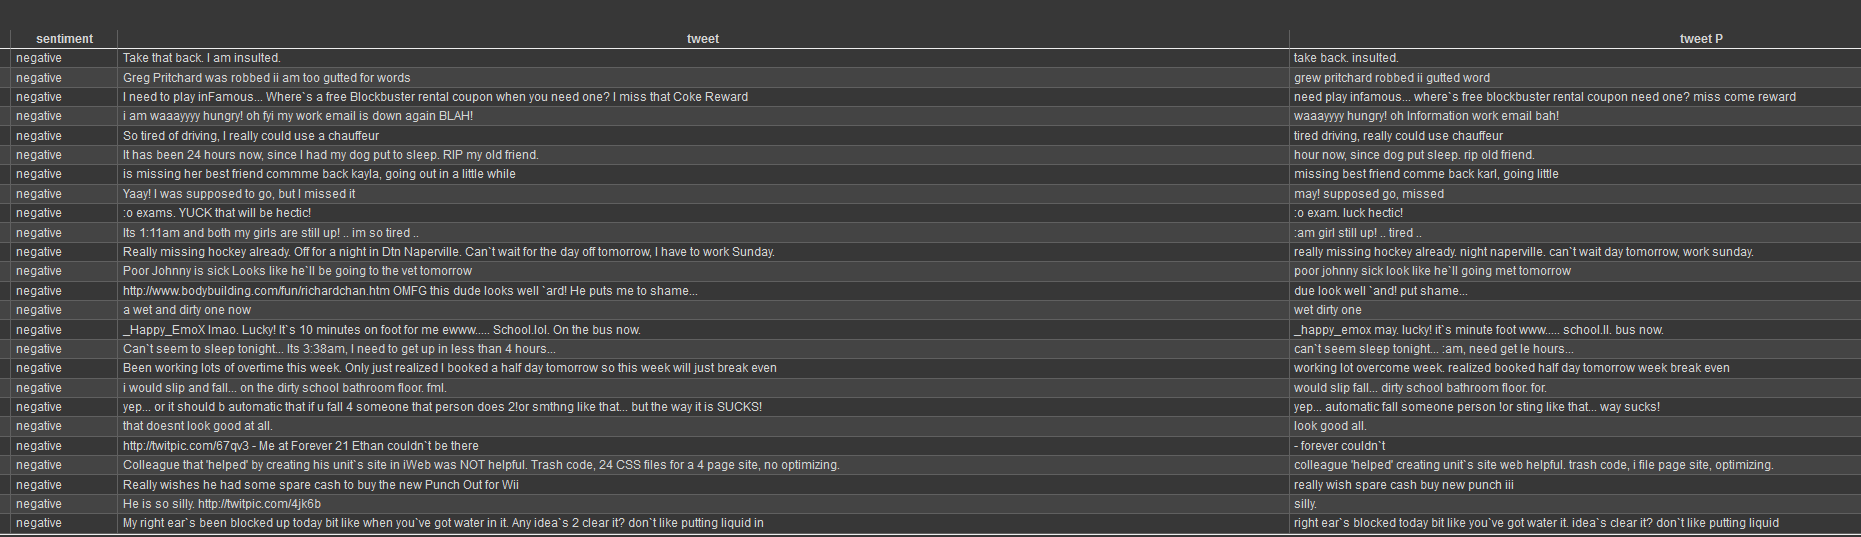

In [ ]:
print("It's" in stopwords.words('english'))
print("F***".split( ))
print(word_tokenize("F***"))

print("It's".split( ))
print(word_tokenize("It's"))

False
['F***']
['F', '*', '*', '*']
["It's"]
['It', "'s"]


In [ ]:
import spacy
sp = spacy.load('en_core_web_sm')
sp.Defaults.stop_words

{"'d",
 "'ll",
 "'m",
 "'re",
 "'s",
 "'ve",
 'a',
 'about',
 'above',
 'across',
 'after',
 'afterwards',
 'again',
 'against',
 'all',
 'almost',
 'alone',
 'along',
 'already',
 'also',
 'although',
 'always',
 'am',
 'among',
 'amongst',
 'amount',
 'an',
 'and',
 'another',
 'any',
 'anyhow',
 'anyone',
 'anything',
 'anyway',
 'anywhere',
 'are',
 'around',
 'as',
 'at',
 'back',
 'be',
 'became',
 'because',
 'become',
 'becomes',
 'becoming',
 'been',
 'before',
 'beforehand',
 'behind',
 'being',
 'below',
 'beside',
 'besides',
 'between',
 'beyond',
 'both',
 'bottom',
 'but',
 'by',
 'ca',
 'call',
 'can',
 'cannot',
 'could',
 'did',
 'do',
 'does',
 'doing',
 'done',
 'down',
 'due',
 'during',
 'each',
 'eight',
 'either',
 'eleven',
 'else',
 'elsewhere',
 'empty',
 'enough',
 'even',
 'ever',
 'every',
 'everyone',
 'everything',
 'everywhere',
 'except',
 'few',
 'fifteen',
 'fifty',
 'first',
 'five',
 'for',
 'former',
 'formerly',
 'forty',
 'four',
 'from',
 'fron

In [ ]:
df.head(1000)

text  \
0                  I`d have responded, if I were going   
1        Sooo SAD I will miss you here in San Diego!!!   
2                            my boss is bullying me...   
3                       what interview! leave me alone   
4     Sons of ****, why couldn`t they put them on t...   
..                                                 ...   
995         I am twittering, LIKE A BOSS. Thanks Savvv   
996   my sleep pattern is screwed i need to try and...   
997   Since the demise of Woolworths it isn`t easy ...   
998    may the fourth be with you! happy star wars day   
999   I`ve been unlocked for decades now...just not...   

                                       selected_text sentiment  \
0                I`d have responded, if I were going   neutral   
1                                           Sooo SAD  negative   
2                                        bullying me  negative   
3                                     leave me alone  negative   
4                                      Sons of ****,  negative   
..                                               ...       ...   
995                                     Thanks Savvv  positive   
996                      my sleep pattern is screwed  positive   
997                               isn`t easy to find  negative   
998  may the fourth be with you! happy star wars day  positive   
999                .just not lucky, never have been.  negative   

                                                text P  \
0                                 i'd responded, going   
1                           sooo sad miss san diego!!!   
2                                   bos bullying me...   
3                               interview! leave alone   
4                 son ****, put release already bought   
..                                                 ...   
995                twittering, like boss. thanks savvv   
996  sleep pattern screwed need try stay midnight g...   
997  since demise woolworth easy find reasonably pr...   
998                 may fourth you! happy star war day   
999  i've unlocked decade now...just lucky, never b...   

                                               text PF  \
0                                 i'd responded, going   
1                           sooo sad miss san diego!!!   
2                                   bos bullying me...   
3                               interview! leave alone   
4                 son ****, put release already bought   
..                                                 ...   
995                twittering, like boss. thanks savvv   
996  sleep pattern screwed need try stay midnight g...   
997  since demise woolworth easy find reasonably pr...   
998                 may fourth you! happy star war day   
999  i've unlocked decade now...just lucky, never b...   

                                            text PTest  
0                                    responded , going  
1                        sooo sad miss san diego ! ! !  
2                                     bos bullying ...  
3                                    interview ! leave  
4                         son * * * * , release bought  
..                                                 ...  
995               twittering , like bos . thanks savvv  
996  sleep pattern screwed need try stay midnight d...  
997  demise woolworth easy find reasonably priced p...  
998                        fourth ! happy star war day  
999  unlocked decade ... lucky , . gottta luck invo...  

[1000 rows x 6 columns]

In [ ]:
#Testing different Stemming Algorithm Porter Stemmer / Snowball Stemmer / Lancaster Stemmer

# Porter Stemmer
def porterStemming(text):
  stems = [PorterStemmer().stem(word) for word in word_tokenize(text)]
  return ' '.join(stems)

#Snowball Stemming
def snowballStemming(text):
  stems = [SnowballStemmer(language='english').stem(word) for word in word_tokenize(text)]
  return ' '.join(stems)

'''
def lancasterStemming(text):
  stems = [LancasterStemmer().stem(word) for word in word_tokenize(text)]
  return ' '.join(stems)
'''
def lancasterStemming(text):
  stems = [LancasterStemmer().stem(word) for word in text.spit(' ')]
  return ' '.join(stems)

df["PS"] = df["text P"].apply(porterStemming)
df['SS'] = df["text P"].apply(snowballStemming)
df['LS'] = df["text P"].apply(snowballStemming)

df.head()

text sentiment  \
0                I`d have responded, if I were going   neutral   
1      Sooo SAD I will miss you here in San Diego!!!  negative   
2                          my boss is bullying me...  negative   
3                     what interview! leave me alone  negative   
4   Sons of ****, why couldn`t they put them on t...  negative   

                          text P                             PS  \
0              responded , going                   respond , go   
1  sooo sad miss san diego ! ! !  sooo sad miss san diego ! ! !   
2               bos bullying ...                   bo bulli ...   
3              interview ! leave               interview ! leav   
4   son * * * * , release bought    son * * * * , releas bought   

                              SS                             LS  
0                   respond , go                   respond , go  
1  sooo sad miss san diego ! ! !  sooo sad miss san diego ! ! !  
2                  bos bulli ...                  bos bulli ...  
3               interview ! leav               interview ! leav  
4    son * * * * , releas bought    son * * * * , releas bought

In [ ]:
df.head(1000)

text sentiment  \
0                  I`d have responded, if I were going   neutral   
1        Sooo SAD I will miss you here in San Diego!!!  negative   
2                            my boss is bullying me...  negative   
3                       what interview! leave me alone  negative   
4     Sons of ****, why couldn`t they put them on t...  negative   
..                                                 ...       ...   
995         I am twittering, LIKE A BOSS. Thanks Savvv  positive   
996   my sleep pattern is screwed i need to try and...  positive   
997   Since the demise of Woolworths it isn`t easy ...  negative   
998    may the fourth be with you! happy star wars day  positive   
999   I`ve been unlocked for decades now...just not...  negative   

                                                text P  \
0                                    responded , going   
1                        sooo sad miss san diego ! ! !   
2                                     bos bullying ...   
3                                    interview ! leave   
4                         son * * * * , release bought   
..                                                 ...   
995               twittering , like bos . thanks savvv   
996  sleep pattern screwed need try stay midnight d...   
997  demise woolworth easy find reasonably priced p...   
998                        fourth ! happy star war day   
999  unlocked decade ... lucky , . gottta luck invo...   

                                                    PS  \
0                                         respond , go   
1                        sooo sad miss san diego ! ! !   
2                                         bo bulli ...   
3                                     interview ! leav   
4                          son * * * * , releas bought   
..                                                 ...   
995                    twitter , like bo . thank savvv   
996  sleep pattern screw need tri stay midnight dec...   
997    demis woolworth easi find reason price pick mix   
998                        fourth ! happi star war day   
999  unlock decad ... lucki , . gottta luck involv ...   

                                                    SS  \
0                                         respond , go   
1                        sooo sad miss san diego ! ! !   
2                                        bos bulli ...   
3                                     interview ! leav   
4                          son * * * * , releas bought   
..                                                 ...   
995                   twitter , like bos . thank savvv   
996  sleep pattern screw need tri stay midnight dec...   
997    demis woolworth easi find reason price pick mix   
998                        fourth ! happi star war day   
999  unlock decad ... lucki , . gottta luck involv ...   

                                                    LS  
0                                         respond , go  
1                        sooo sad miss san diego ! ! !  
2                                        bos bulli ...  
3                                     interview ! leav  
4                          son * * * * , releas bought  
..                                                 ...  
995                   twitter , like bos . thank savvv  
996  sleep pattern screw need tri stay midnight dec...  
997    demis woolworth easi find reason price pick mix  
998                        fourth ! happi star war day  
999  unlock decad ... lucki , . gottta luck involv ...  

[1000 rows x 6 columns]

In [ ]:
df.drop(columns=['LS', 'PS', 'SS'], inplace=True)

In [ ]:
#df.rename(columns={'LS': 'tweet P'}, inplace=True)

In [ ]:
#Parts of speech

from nltk.tokenize import word_tokenize
from nltk import pos_tag
nltk.download('averaged_perceptron_tagger')

def posTagging(tweet):
  word_tokens = tweet.split(' ') #word_tokenize(tweet)
  return pos_tag(word_tokens)

df["tweet POS Tagging"] = df["text P"].apply(posTagging)

def namedEntityRecognition(text):
	word_tokens = text.split()
	word_pos = pos_tag(word_tokens)
	return ne_chunk(word_pos)

def spacyLargeNER(document):
  return {(ent.text.strip(), ent.label_) for ent in NER(document).ents}

# Select a subset of your DataFrame
subset = df['text P'].iloc[1000:2000]

# Convert the subset to a string
doc_subset = str(subset.values)

# Perform NER on the subset
nlp_subset = sp(doc_subset)

# Visualize the entities
displacy.render(sp(nlp_subset), style="ent", jupyter=True)


[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [ ]:
spacy.explain('GPE')

'Countries, cities, states'

In [ ]:
df.head(100)

text sentiment  \
0                 I`d have responded, if I were going   neutral   
1       Sooo SAD I will miss you here in San Diego!!!  negative   
2                           my boss is bullying me...  negative   
3                      what interview! leave me alone  negative   
4    Sons of ****, why couldn`t they put them on t...  negative   
..                                                ...       ...   
95        Happy Mothers day to all you Mums out there  positive   
96   CASEY`S GONE?!?! BUT WHY?! So, she piddled a ...  negative   
97       hemp cloth is marvelous but unfortunately no  negative   
98  Gonna read a story bout adam lambert online th...   neutral   
99     We saw that in none 3D - the baddie`s the best  positive   

                                               text P  \
0                                   responded , going   
1                       sooo sad miss san diego ! ! !   
2                                    bos bullying ...   
3                                   interview ! leave   
4                        son * * * * , release bought   
..                                                ...   
95                               happy mother day mum   
96  casey gone ? ! ? ! ? ! , piddled little carpet...   
97                 hemp cloth marvelous unfortunately   
98  gon na read story bout adam lambert online bed...   
99                               saw 3d - baddie best   

                                    tweet POS Tagging  
0            [(responded, VBD), (,, ,), (going, VBG)]  
1   [(sooo, JJ), (sad, JJ), (miss, NN), (san, JJ),...  
2             [(bos, NNS), (bullying, VBG), (..., :)]  
3              [(interview, NN), (!, .), (leave, VB)]  
4   [(son, NN), (*, NNP), (*, NNP), (*, NNP), (*, ...  
..                                                ...  
95  [(happy, JJ), (mother, NN), (day, NN), (mum, V...  
96  [(casey, NN), (gone, VBN), (?, .), (!, .), (?,...  
97  [(hemp, NN), (cloth, DT), (marvelous, JJ), (un...  
98  [(gon, NN), (na, TO), (read, VB), (story, NN),...  
99  [(saw, VBD), (3d, CD), (-, :), (baddie, NN), (...  

[100 rows x 4 columns]

In [ ]:
# Drop unnecessary columns
df.drop(columns=['tweet POS Tagging'], inplace=True)

In [ ]:
nltk.download('tagsets')
nltk.help.upenn_tagset()

$: dollar
    $ -$ --$ A$ C$ HK$ M$ NZ$ S$ U.S.$ US$
'': closing quotation mark
    ' ''
(: opening parenthesis
    ( [ {
): closing parenthesis
    ) ] }
,: comma
    ,
--: dash
    --
.: sentence terminator
    . ! ?
:: colon or ellipsis
    : ; ...
CC: conjunction, coordinating
    & 'n and both but either et for less minus neither nor or plus so
    therefore times v. versus vs. whether yet
CD: numeral, cardinal
    mid-1890 nine-thirty forty-two one-tenth ten million 0.5 one forty-
    seven 1987 twenty '79 zero two 78-degrees eighty-four IX '60s .025
    fifteen 271,124 dozen quintillion DM2,000 ...
DT: determiner
    all an another any both del each either every half la many much nary
    neither no some such that the them these this those
EX: existential there
    there
FW: foreign word
    gemeinschaft hund ich jeux habeas Haementeria Herr K'ang-si vous
    lutihaw alai je jour objets salutaris fille quibusdam pas trop Monte
    terram fiche oui corporis ...
IN: preposition or

[nltk_data] Downloading package tagsets to /root/nltk_data...
[nltk_data]   Package tagsets is already up-to-date!


In [ ]:
# CAUTION When using this line
df['sentiment'] = df['sentiment'].map( {'negative': 0, 'positive': 1} )

In [ ]:
# Import the dependencies
import wordcloud
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Create a function to plot for each category
def show_wordcloud(df, title, color = 'viridis'):
    text = ' '.join(df['text'].astype(str).tolist())
    stopwords = set(wordcloud.STOPWORDS)

    fig_wordcloud = wordcloud.WordCloud(stopwords=stopwords,background_color='lightgrey',
                    colormap=color, width=800, height=600).generate(text)

    plt.figure(figsize=(10,10), frameon=True)
    plt.imshow(fig_wordcloud)
    plt.axis('off')
    plt.title(title, fontsize=20)
    plt.show()

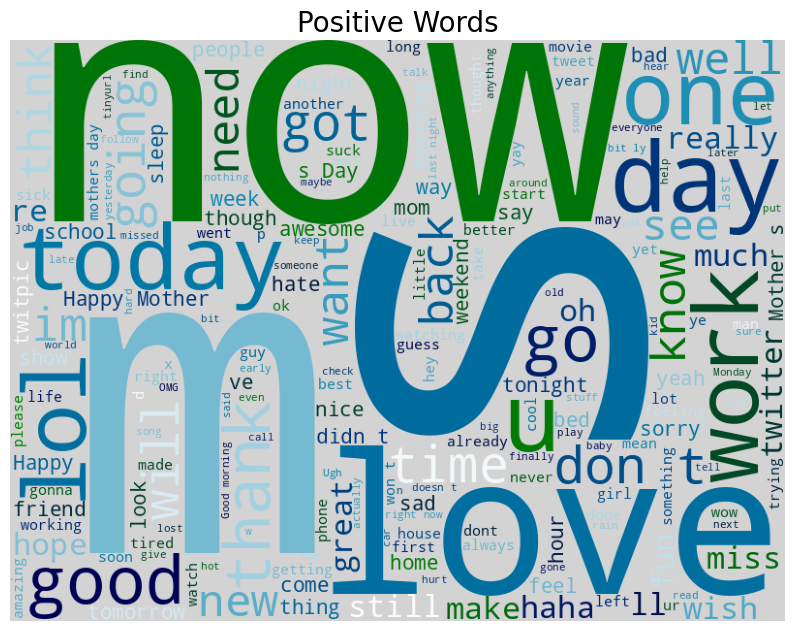

In [ ]:
show_wordcloud(df, 'Positive Words', 'ocean_r')

In [ ]:
data_negative = df[df['sentiment'] == 0].copy()
data_positive = df[df['sentiment'] == 1].copy()

# Import the dependencies
import wordcloud
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Create a function to plot for each category
def show_wordcloud(df, title, color = 'viridis'):
    text = ' '.join(df['LS'].astype(str).tolist())
    stopwords = set(wordcloud.STOPWORDS)

    fig_wordcloud = wordcloud.WordCloud(stopwords=stopwords,background_color='lightgrey',
                    colormap=color, width=800, height=600).generate(text)

    plt.figure(figsize=(10,10), frameon=True)
    plt.imshow(fig_wordcloud)
    plt.axis('off')
    plt.title(title, fontsize=20)
    plt.show()

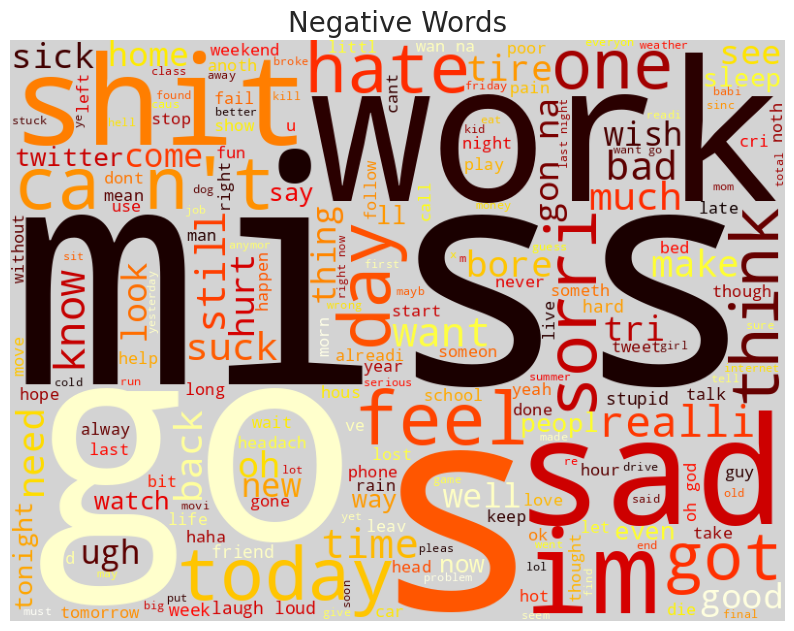

In [ ]:
show_wordcloud(data_negative, 'Negative Words', color='hot')

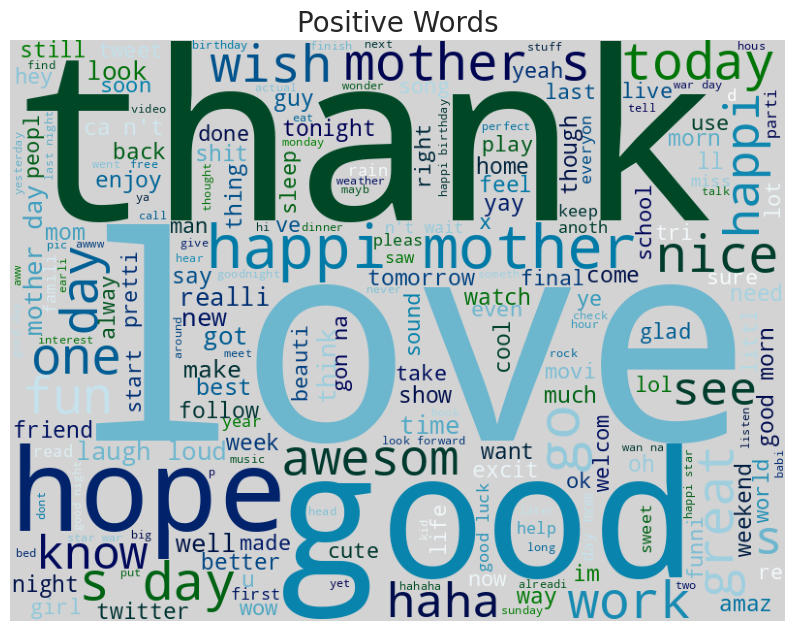

In [ ]:
show_wordcloud(data_positive, 'Positive Words', 'ocean_r')

In [ ]:
# Further analysis of the Dataset

df[df['tweet P'].str.contains("im")]

sentiment                                            tweet P
25             1             free fillin' app ipod fun, im addicted
39             1  little happy wine jeje ok it'sm free time care...
41             1            im avid fan shit magazine love magazine
46             0  egh blah boooooooooooo dunno wanna go work han...
64             0         mannnn..... _ got iphone!!! im jealous....
...          ...                                                ...
27436          0  hi all!! daughters.. youngest turn monday.. ti...
27443          1  yes! love him. seen eps many time quote line him.
27455          1  simple greeting unexpected people actually lig...
27464          0  rec game....trying cry...the pain much..i need...
27472          0                         - wanted visit animal late

[1695 rows x 2 columns]

In [ ]:
'''
PUNCT_TO_REMOVE = string.punctuation
def removePunctuations(tweet):
	translator = str.maketrans('', '', string.punctuation)
	return tweet.translate(str.maketrans('', '', PUNCT_TO_REMOVE))
'''
'''
def removeStopwords(tweet):
  tweet = word_tokenize(tweet)
  tweet = [word for word in tweet if not word in set(stopwords.words('english'))]
  tweet = ' '.join(tweet)
  return tweet
'''
#Will remove usernames, hastags, hyperlinks, Non ASCII characters
def removeUnrelatedData(tweet):
  tweet = re.sub("`", "'", tweet) #Replace ` with ' e.g. I`m to I'm
  tweet = re.sub('@[^\s]+','@user',tweet) #Remove user names
  #tweet = re.sub('#[^\s]+','',tweet)
  tweet = re.sub('http[^\s]+','',tweet) #Remove Urls
  tweet = re.sub('[^\x00-\x7F]+','', tweet) #Remove non ASCII characters
  tweet = re.sub('&[^\s]*;','',tweet)
  #tweet = re.sub("^\d+\s|\s\d+\s|\s\d+$", '', tweet) #Thanks to https://stackoverflow.com/questions/817122/delete-digits-in-python-regex , this will remove numbers that are not attached to words
  tweet = re.sub(r'\b\d+\b', '', tweet) #This will only remove digits that are not attached to words preventing the removal of words like h3ll
  #tweet = re.sub(r'\d+', '', tweet) #Remove digits
  '''
  pattern = r"([^\w\s])"
  replacement = r" \1 "
  tweet = re.sub(pattern, replacement, tweet).strip()

  pattern = r"([^\w\s])"
  replacement = r" \1 "
  tweet = re.sub(pattern, replacement, tweet).strip() #Will remove punctuations only if they are not attached to words
  '''
  if tweet == '':
    return 'Neutral'
  return tweet

def remove_whitespace(text):
  return " ".join(text.split())

'''
def removePunctuations(tweet):
  tweet = tweet.replace("#", " ")
  #translator = str.maketrans('', ' ', string.punctuation)
  return tweet.translate(str.maketrans('', '', string.punctuation.replace("`", ""))) #To avoid removing ' from words like can't I'm
'''

def removePunctuations(text):
  translator = str.maketrans('', '', string.punctuation)
  return text.translate(translator)

#Will remove stopwords and punctuations
def removeStopwords(tweet):
  stopW = stopwords.words('english')
  tweet = tweet.split(' ') #word_tokenize(tweet)
  tweet = [word for word in tweet if not word.lower() in set(stopW)]
  tweet = ' '.join(tweet)
  if tweet == '':
    return 'Neutral'
  return tweet

def removeStopwords2(text):
  stopwords = spacy.lang.en.stop_words.STOP_WORDS
  text = " ".join([token for token in text.split() if token.lower() not in stopwords])
  return text

spell = SpellChecker()
def correctSpellings(tweet):
  try:
    correctedTweet = []
    missSpelledWords = spell.unknown(tweet.split()) #To avoid altering acryonyms
    for word in tweet.split(): # use tokenize method to split the text
      if word in missSpelledWords:
        correctedTweet.append(spell.correction(word))
      else:
        correctedTweet.append(word)
    return ' '.join(correctedTweet) # join the corrected words with space
  except:
    return tweet

from textblob import TextBlob

def correctSpellings2(tweet):
  return str(TextBlob(tweet).correct())

def urbanDictionaryTranslator(text):
    new_text = []
    for w in text.split():
        if w.upper() in chat_words_list:
            new_text.append(chat_words_map_dict[w.upper()])
        else:
            new_text.append(w)
    return " ".join(new_text)

'''
lemmatizer = WordNetLemmatizer()
def lemmatize(tweet):
  word_tokens = word_tokenize(tweet)
  # provide context i.e. part-of-speech
  lemmasTweet = [lemmatizer.lemmatize(word, pos ='v') for word in word_tokens]
  return lemmasTweet
'''


def removeNoneEnglishwords(tweet):
  #tweet = word_tokenize(tweet)
  tweet = tweet.split(' ')
  #tweet = [word for word in tweet if word in set(nltk.corpus.words.words())]
  tweet = [word for word in tweet if word in ENGLISH_WORDS]
  tweet = ' '.join(tweet)
  return tweet


def lemmatizeWords(tweet):
    return " ".join([WordNetLemmatizer().lemmatize(word) for word in tweet.split()])


#df['tweet P'] = df['tweet'].apply(remove_whitespace)

#Remove Usernames, hashtags, hyperlinks
df['text P'] = df['text'].apply(removeUnrelatedData)

#Remove stop words
#df['text P'] = df['text P'].apply(removeStopwords)

#Urban (Internet Slang) translator
df['text P'] = df['text P'].apply(urbanDictionaryTranslator)

#Lower case the texts
df["text P"] = df["text P"].str.lower()

#Correct Spellings
#df["text P"] = df["text P"].apply(correctSpellings)

#Remove stop words
df['text P'] = df['text P'].apply(removeStopwords)

#Remove Punctuations
#df['text P'] = df['text P'].apply(removePunctuations)

#df['text P'] = df['text P'].apply(removeNoneEnglishwords)


#Lemetize Words
df["text P"] = df["text P"].apply(lambda tweet: lemmatizeWords(tweet))

#Remove Punctuations
#df["RP"] = df["Lower"].apply(lambda tweet: removePunctuations(tweet))

df.head(5000)


text  \
0                   I`d have responded, if I were going   
1         Sooo SAD I will miss you here in San Diego!!!   
2                             my boss is bullying me...   
3                        what interview! leave me alone   
4      Sons of ****, why couldn`t they put them on t...   
...                                                 ...   
4995   look like i can only quick post from the dash...   
4996   Thanks Elaine. I`m clipping reviews for her s...   
4997  K now that, that fiasco is all wrapped and goo...   
4998                  No. I won`t be back until the 7th   
4999  Sooo tired and have a headache-all self inflic...   

                                          selected_text sentiment  \
0                   I`d have responded, if I were going   neutral   
1                                              Sooo SAD  negative   
2                                           bullying me  negative   
3                                        leave me alone  negative   
4                                         Sons of ****,  negative   
...                                                 ...       ...   
4995  look like i can only quick post from the dashb...   neutral   
4996                                             Thanks  positive   
4997  K now that, that fiasco is all wrapped and goo...  positive   
4998                  No. I won`t be back until the 7th   neutral   
4999  Sooo tired and have a headache-all self inflic...   neutral   

                                                text PF  \
0                                      responded  going   
1                            sooo sad miss san diego      
2                                         bos bullying    
3                                      interview  leave   
4                               son      release bought   
...                                                 ...   
4995                     look like quick post dashboard   
4996          thanks elaine  clipping review scrapbook    
4997          k  fiasco wrapped good studying midterm     
4998                                             wo 7th   
4999  sooo tired headacheall self inflicted course  ...   

                                                 text P  
0                                  i'd responded, going  
1                            sooo sad miss san diego!!!  
2                                    bos bullying me...  
3                                interview! leave alone  
4                  son ****, put release already bought  
...                                                 ...  
4995                     look like quick post dashboard  
4996          thanks elaine. clipping review scrapbook.  
4997  k that, fiasco wrapped good go back studying m...  
4998                                       no. back 7th  
4999  sooo tired headache-all self inflicted course!...  

[5000 rows x 5 columns]

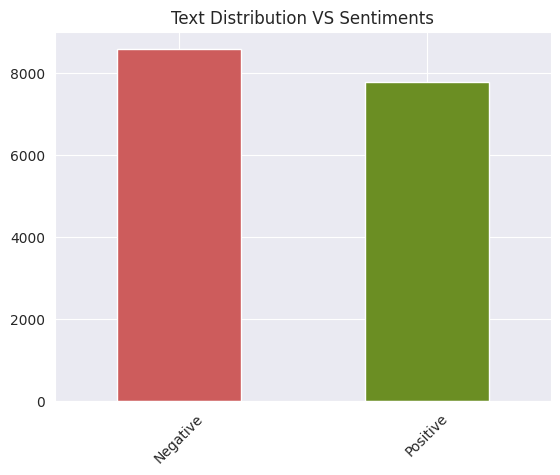

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

count_Class= pd.value_counts(df["sentiment"], sort= True)
sns.set_style("darkgrid")
count_Class.plot(kind = 'bar', color = ["indianred","olivedrab"])
plt.xticks([0, 1], ["Negative", "Positive"], rotation=45)
plt.title('Text Distribution VS Sentiments')
plt.show()
#plt is  matplotlib. pyplot

Training and Evaluating the Models

**Text Vectorization** [TfidVectorizer]

[Logistic Regression]
              precision    recall  f1-score   support

           0       0.83      0.87      0.85      1567
           1       0.88      0.83      0.86      1706

    accuracy                           0.85      3273
   macro avg       0.85      0.85      0.85      3273
weighted avg       0.85      0.85      0.85      3273



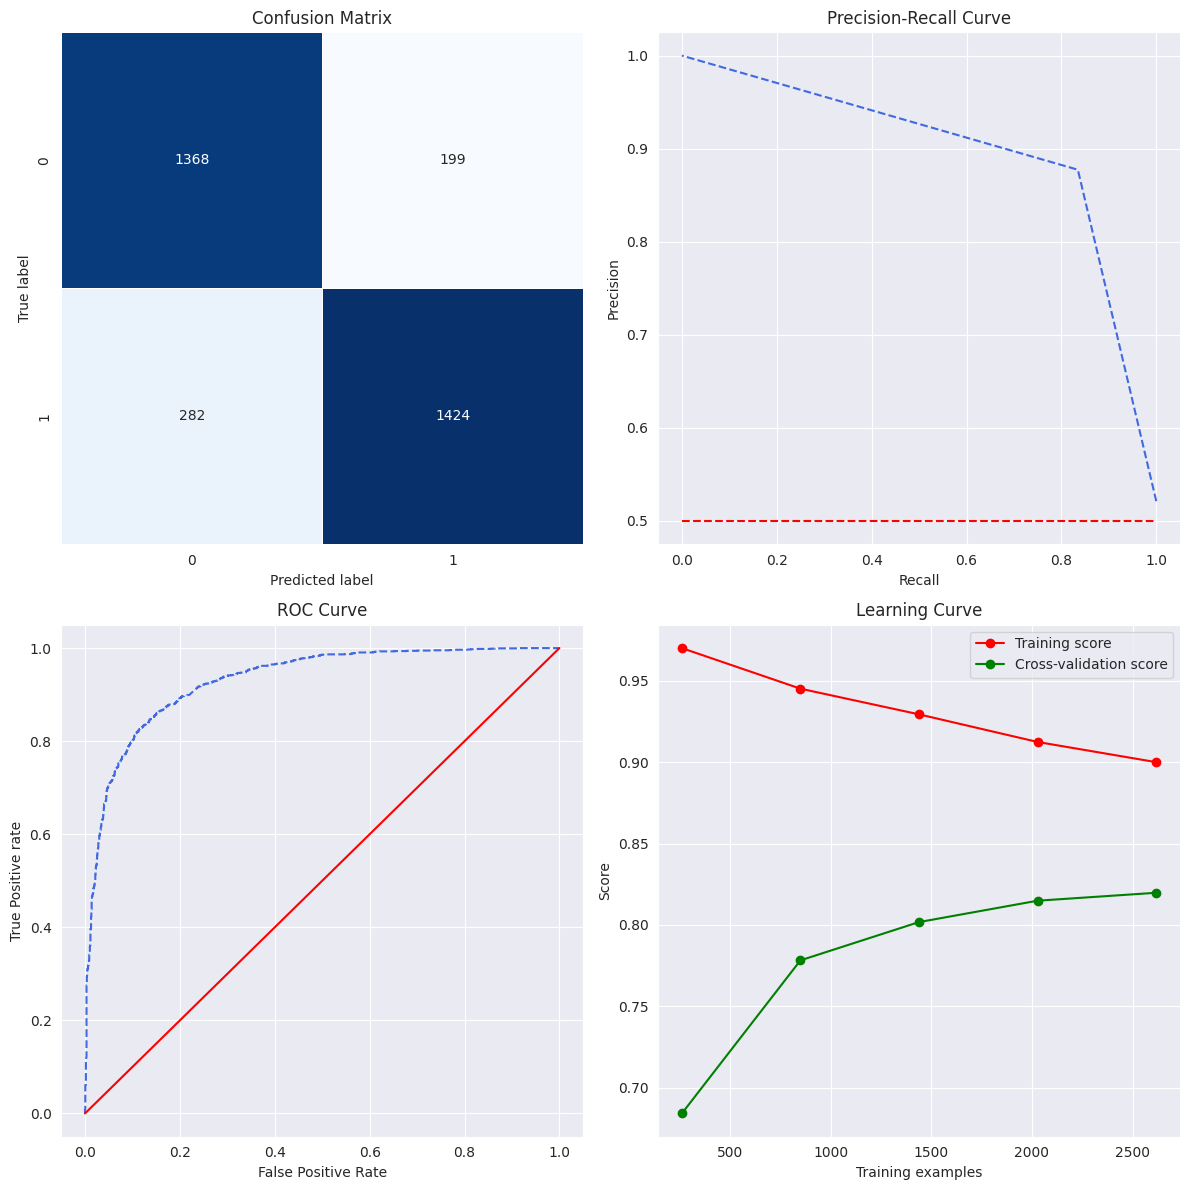

[Naive Bayes]
              precision    recall  f1-score   support

           0       0.84      0.83      0.83      1567
           1       0.84      0.85      0.85      1706

    accuracy                           0.84      3273
   macro avg       0.84      0.84      0.84      3273
weighted avg       0.84      0.84      0.84      3273



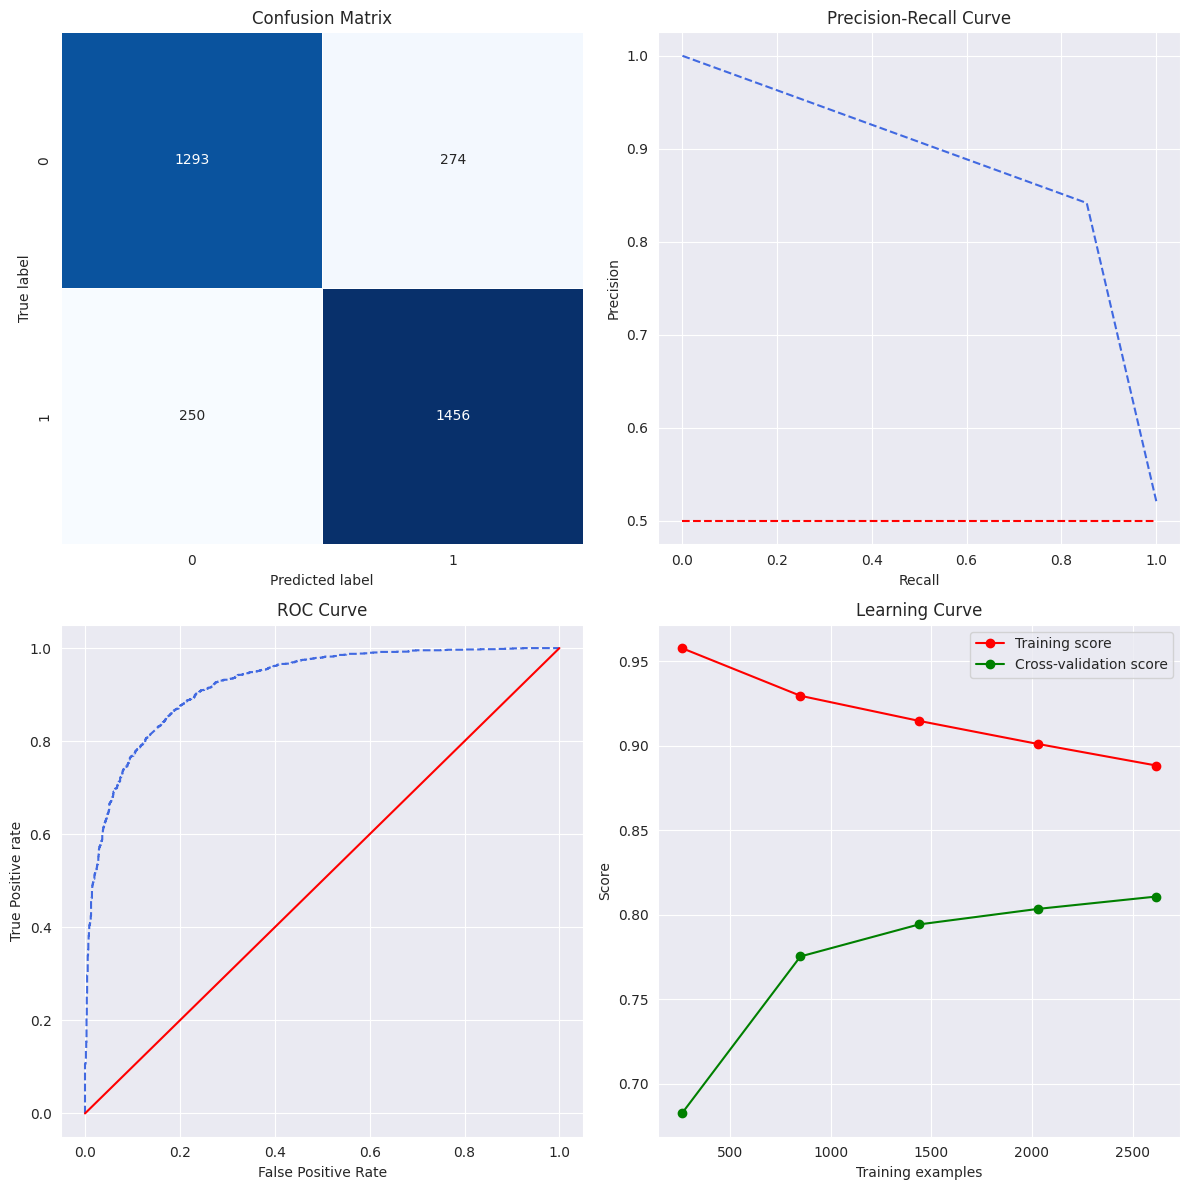

[Gaussian Naive Bayes]
              precision    recall  f1-score   support

           0       0.80      0.74      0.77      1567
           1       0.78      0.83      0.80      1706

    accuracy                           0.79      3273
   macro avg       0.79      0.78      0.78      3273
weighted avg       0.79      0.79      0.79      3273



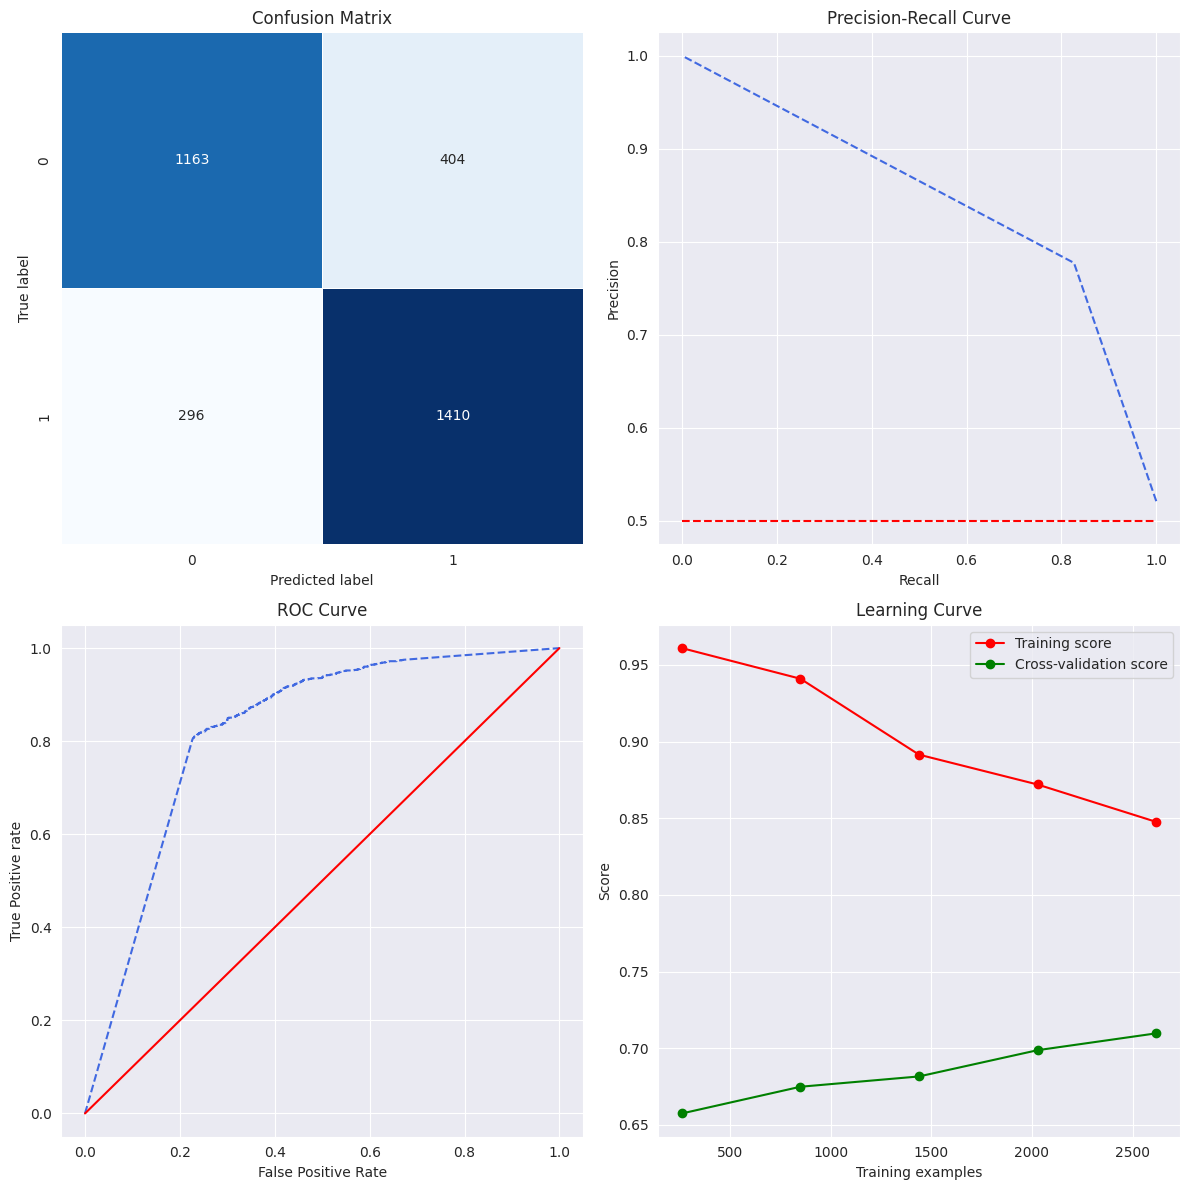

[KNN]
              precision    recall  f1-score   support

           0       0.79      0.39      0.52      1567
           1       0.62      0.90      0.73      1706

    accuracy                           0.66      3273
   macro avg       0.70      0.65      0.63      3273
weighted avg       0.70      0.66      0.63      3273



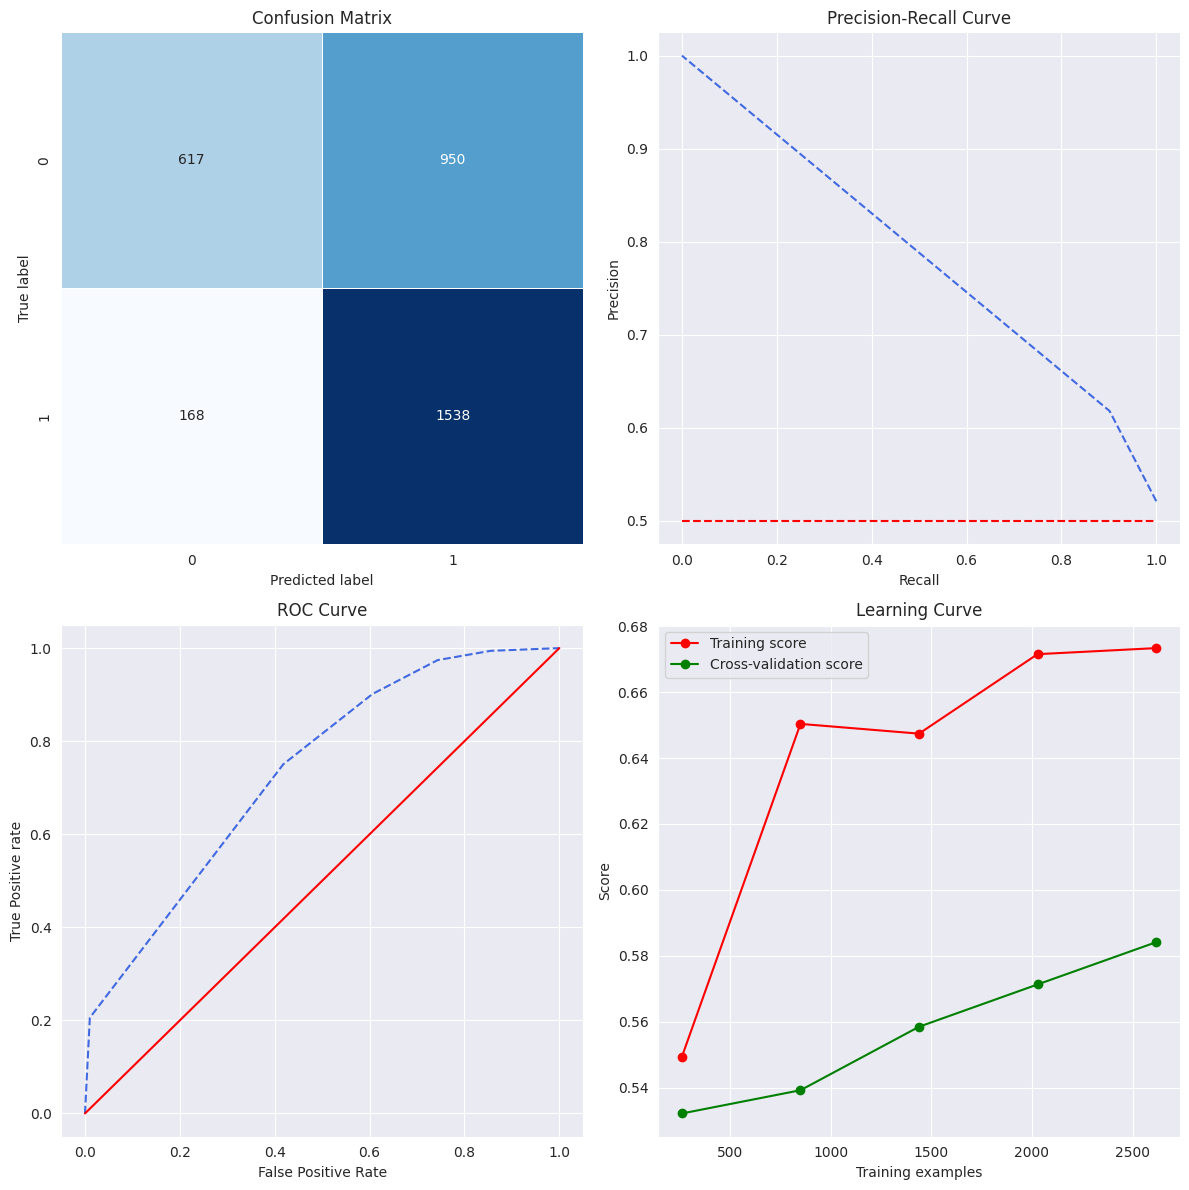

[LightGBM]
              precision    recall  f1-score   support

           0       0.81      0.88      0.85      1567
           1       0.88      0.81      0.85      1706

    accuracy                           0.85      3273
   macro avg       0.85      0.85      0.85      3273
weighted avg       0.85      0.85      0.85      3273



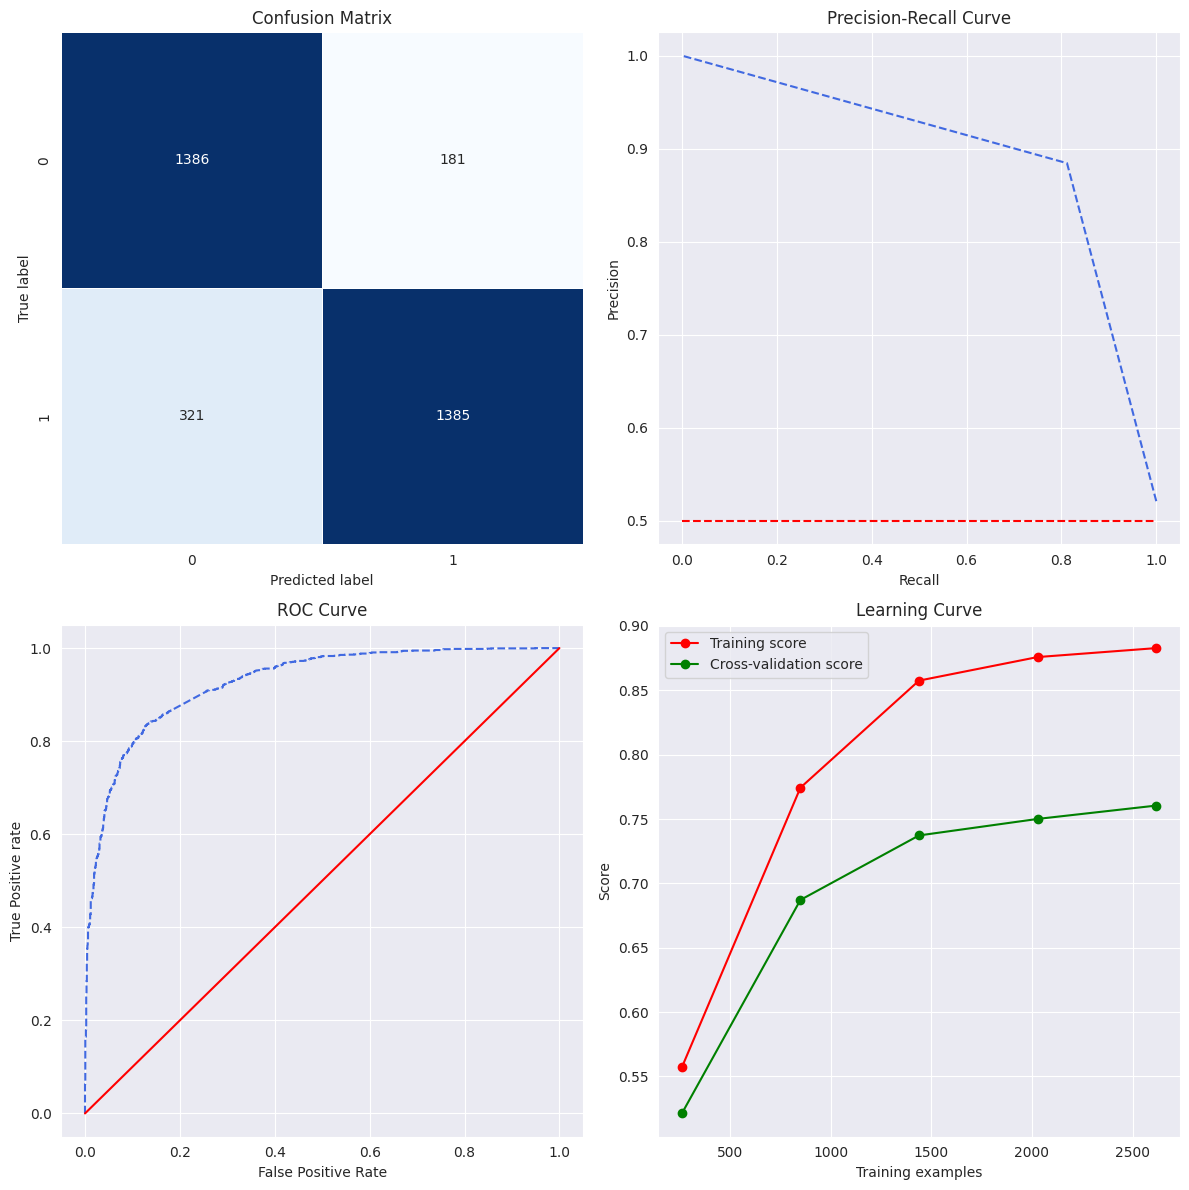

[SimpleRNN]
Epoch 1/50
410/410 [==============================] - 16s 33ms/step - loss: 0.4655 - accuracy: 0.7655 - val_loss: 0.3787 - val_accuracy: 0.8326
Epoch 2/50
410/410 [==============================] - 6s 15ms/step - loss: 0.2230 - accuracy: 0.9162 - val_loss: 0.4217 - val_accuracy: 0.8252
Epoch 3/50
410/410 [==============================] - 8s 20ms/step - loss: 0.1119 - accuracy: 0.9618 - val_loss: 0.5157 - val_accuracy: 0.8069
Epoch 4/50
410/410 [==============================] - 6s 14ms/step - loss: 0.0541 - accuracy: 0.9833 - val_loss: 0.6092 - val_accuracy: 0.8060
Epoch 5/50
410/410 [==============================] - 6s 15ms/step - loss: 0.0299 - accuracy: 0.9919 - val_loss: 0.7009 - val_accuracy: 0.7962
Epoch 6/50
410/410 [==============================] - 7s 16ms/step - loss: 0.0198 - accuracy: 0.9935 - val_loss: 0.7813 - val_accuracy: 0.7880
Epoch 7/50
410/410 [==============================] - 6s 14ms/step - loss: 0.0154 - accuracy: 0.9956 - val_loss: 0.8108 - val_acc

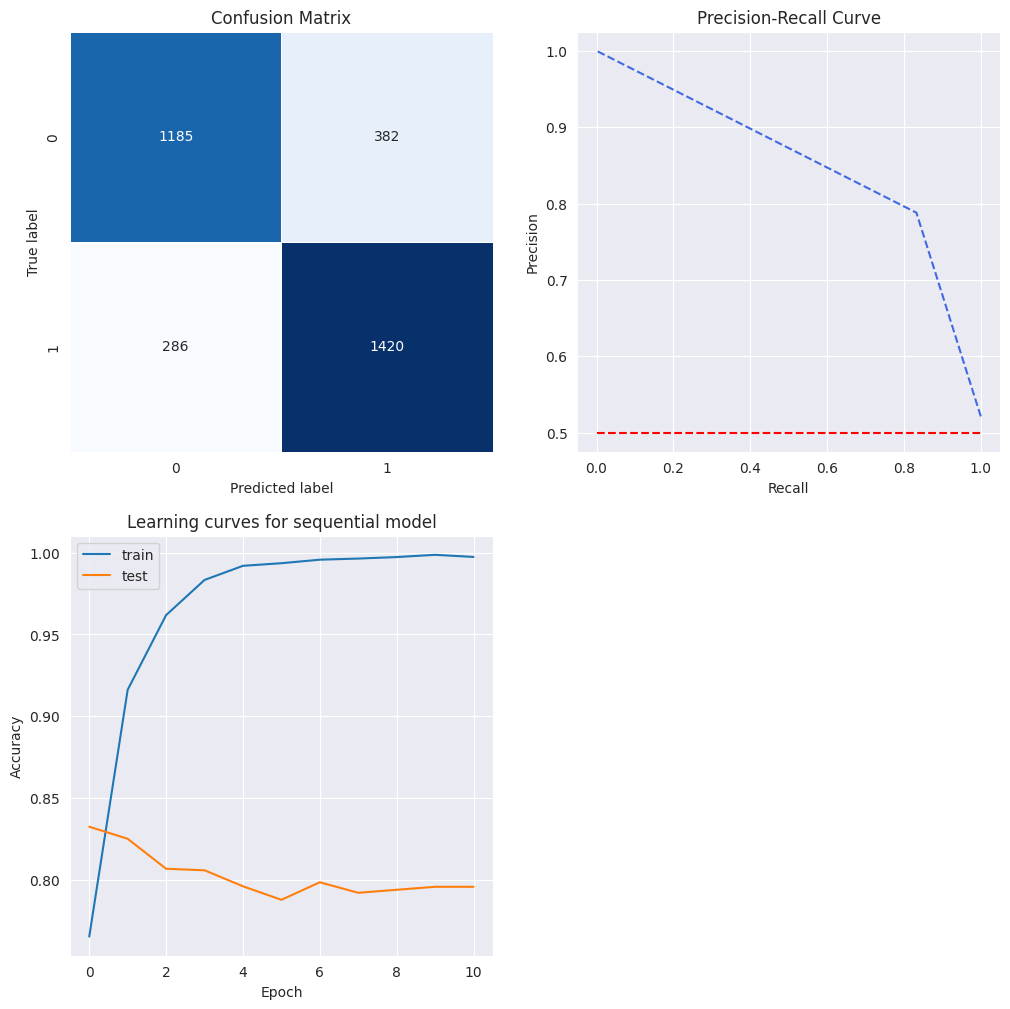

[LSTM]
Epoch 1/50
410/410 [==============================] - 12s 25ms/step - loss: 0.4573 - accuracy: 0.7740 - val_loss: 0.3667 - val_accuracy: 0.8356
Epoch 2/50
410/410 [==============================] - 3s 8ms/step - loss: 0.2458 - accuracy: 0.9034 - val_loss: 0.3764 - val_accuracy: 0.8384
Epoch 3/50
410/410 [==============================] - 3s 7ms/step - loss: 0.1570 - accuracy: 0.9441 - val_loss: 0.4620 - val_accuracy: 0.8277
Epoch 4/50
410/410 [==============================] - 3s 7ms/step - loss: 0.1169 - accuracy: 0.9610 - val_loss: 0.5158 - val_accuracy: 0.8234
Epoch 5/50
410/410 [==============================] - 3s 8ms/step - loss: 0.0905 - accuracy: 0.9717 - val_loss: 0.5602 - val_accuracy: 0.8179
Epoch 6/50
410/410 [==============================] - 3s 7ms/step - loss: 0.0774 - accuracy: 0.9761 - val_loss: 0.6149 - val_accuracy: 0.8136
Epoch 7/50
410/410 [==============================] - 3s 7ms/step - loss: 0.0661 - accuracy: 0.9791 - val_loss: 0.6509 - val_accuracy: 0.80

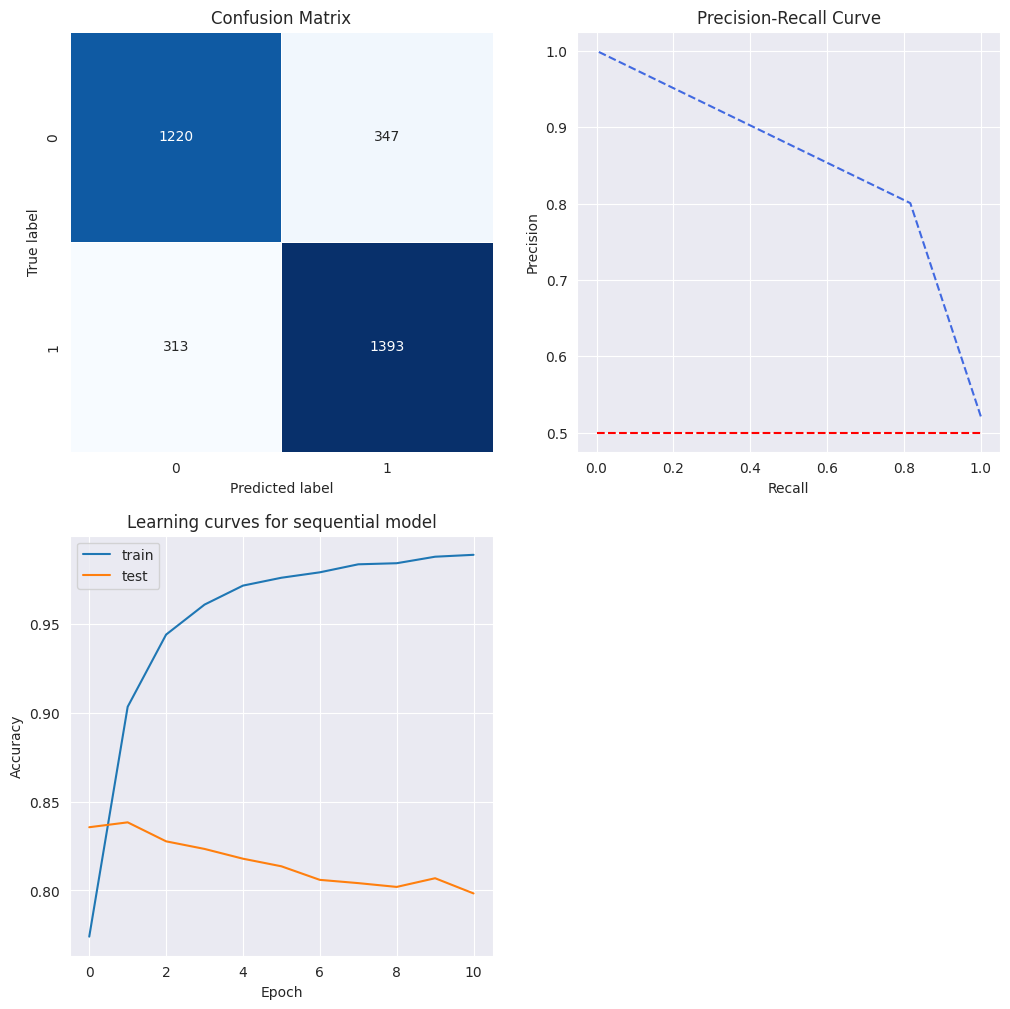

[BI-LSTM]
Epoch 1/50
410/410 [==============================] - 15s 27ms/step - loss: 0.4373 - accuracy: 0.7898 - val_loss: 0.3942 - val_accuracy: 0.8191
Epoch 2/50
410/410 [==============================] - 5s 12ms/step - loss: 0.2233 - accuracy: 0.9162 - val_loss: 0.4034 - val_accuracy: 0.8368
Epoch 3/50
410/410 [==============================] - 5s 11ms/step - loss: 0.1313 - accuracy: 0.9558 - val_loss: 0.4982 - val_accuracy: 0.8277
Epoch 4/50
410/410 [==============================] - 4s 10ms/step - loss: 0.0796 - accuracy: 0.9730 - val_loss: 0.5661 - val_accuracy: 0.8219
Epoch 5/50
410/410 [==============================] - 4s 9ms/step - loss: 0.0524 - accuracy: 0.9842 - val_loss: 0.6692 - val_accuracy: 0.8142
Epoch 6/50
410/410 [==============================] - 3s 8ms/step - loss: 0.0375 - accuracy: 0.9892 - val_loss: 0.7256 - val_accuracy: 0.8103
Epoch 7/50
410/410 [==============================] - 5s 11ms/step - loss: 0.0289 - accuracy: 0.9914 - val_loss: 0.8264 - val_accurac

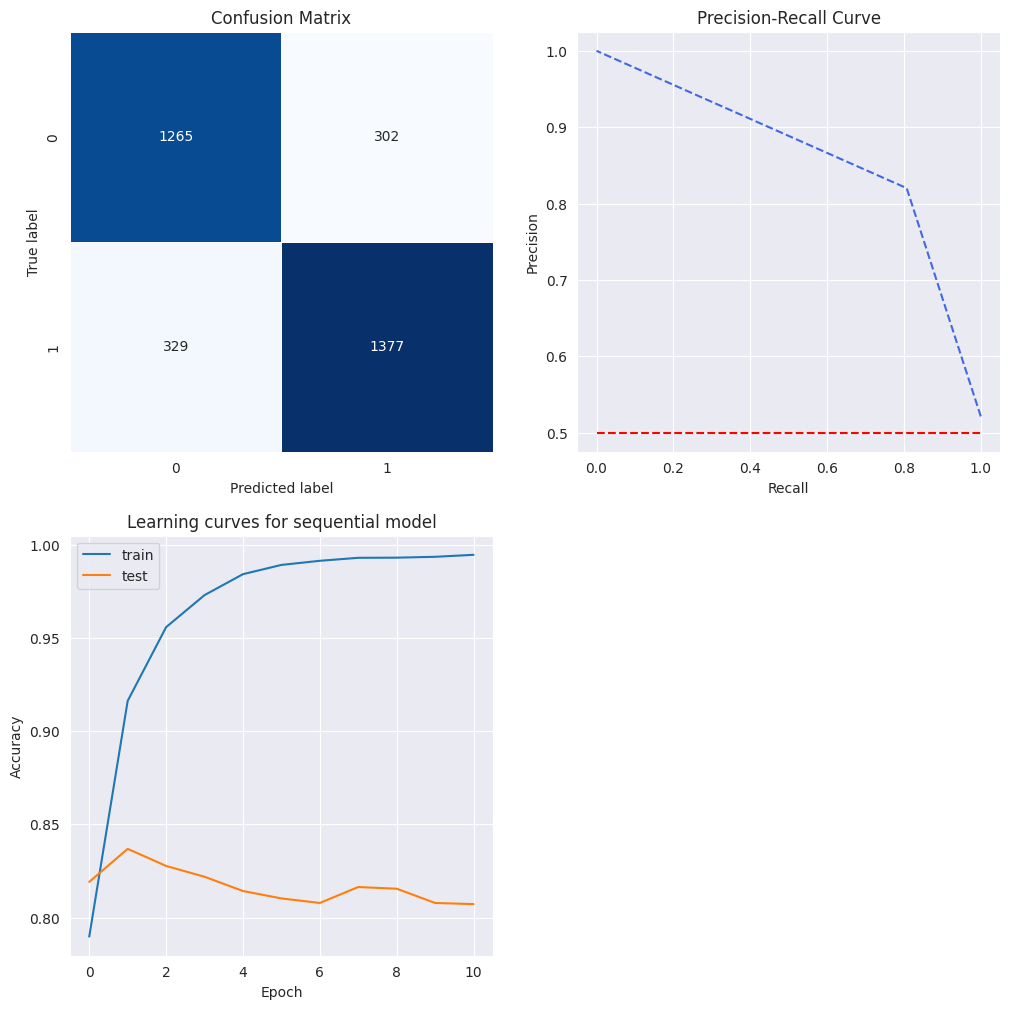

[GRU]
Epoch 1/50
410/410 [==============================] - 13s 26ms/step - loss: 0.4656 - accuracy: 0.7573 - val_loss: 0.3611 - val_accuracy: 0.8414
Epoch 2/50
410/410 [==============================] - 3s 8ms/step - loss: 0.2422 - accuracy: 0.9054 - val_loss: 0.3776 - val_accuracy: 0.8402
Epoch 3/50
410/410 [==============================] - 3s 7ms/step - loss: 0.1583 - accuracy: 0.9447 - val_loss: 0.4359 - val_accuracy: 0.8323
Epoch 4/50
410/410 [==============================] - 4s 9ms/step - loss: 0.1139 - accuracy: 0.9619 - val_loss: 0.5169 - val_accuracy: 0.8185
Epoch 5/50
410/410 [==============================] - 4s 9ms/step - loss: 0.0859 - accuracy: 0.9718 - val_loss: 0.5358 - val_accuracy: 0.8176
Epoch 6/50
410/410 [==============================] - 3s 7ms/step - loss: 0.0654 - accuracy: 0.9788 - val_loss: 0.6177 - val_accuracy: 0.8185
Epoch 7/50
410/410 [==============================] - 3s 7ms/step - loss: 0.0507 - accuracy: 0.9841 - val_loss: 0.6747 - val_accuracy: 0.809

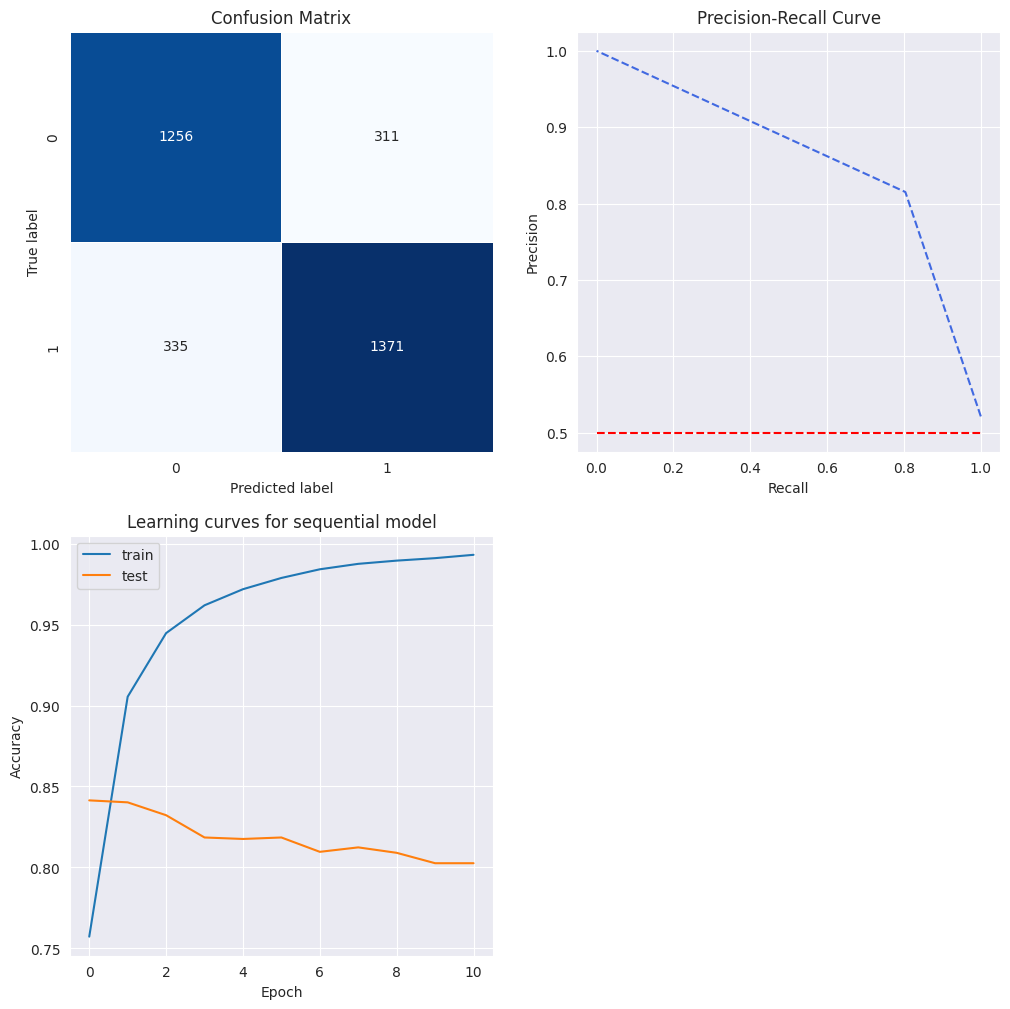

In [ ]:
from sklearn.metrics import classification_report
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, Dense, LSTM, Bidirectional, GRU
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB, GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from lightgbm import LGBMClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_curve
from sklearn.metrics import accuracy_score, f1_score, recall_score, confusion_matrix, precision_recall_curve
from sklearn.feature_extraction.text import TfidfVectorizer
import keras
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import learning_curve, validation_curve
import numpy as np

def plot_results3(name, model, X_test, Y_test, predictions, history):
    mtx = confusion_matrix(Y_test, predictions)
    plt.figure(figsize=(12,12))
    plt.subplot(221)
    plt.title('Confusion Matrix')
    sns.heatmap(mtx, annot=True, fmt='d', linewidths=.5, cmap="Blues", cbar=False)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

    precision, recall, _ = precision_recall_curve(Y_test, predictions)
    plt.subplot(222)
    plt.plot(recall, precision, linestyle='--', color='royalblue')
    plt.plot([0, 1], [0.5, 0.5], linestyle='--', color='red') # Adding baseline
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision-Recall Curve')

    # roc curve for tpr = fpr
    if name not in ['SimpleRNN', 'LSTM', 'BI-LSTM', 'GRU']: #predict_proba is not available for sequential models.
      random_probs = [0 for i in range(len(Y_test))]
      p_fpr, p_tpr, _ = roc_curve(Y_test, random_probs, pos_label=1)
      pred_prob = model.predict_proba(X_test)
      fpr, tpr, thresh = roc_curve(Y_test, pred_prob[:,1], pos_label=1)
      plt.subplot(223)
      plt.plot(fpr, tpr, linestyle='--',color='royalblue')
      plt.plot(p_fpr, p_tpr, color='red')
      # title
      plt.title('ROC Curve')
      # x label
      plt.xlabel('False Positive Rate')
      # y label
      plt.ylabel('True Positive rate')
      plt.savefig('ROC',dpi=300)
      plt.tight_layout(pad=1.20)

      #  Learning curve
      train_sizes, train_scores, test_scores = learning_curve(model, X_test, Y_test)
      train_scores_mean = np.mean(train_scores, axis=1)
      test_scores_mean = np.mean(test_scores, axis=1)
      plt.subplot(224)
      plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
      plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")
      plt.xlabel('Training examples')
      plt.ylabel('Score')
      plt.title('Learning Curve')
      plt.legend(loc="best")
      plt.tight_layout()
    else:
      plt.subplot(223)
      plt.plot(history.history['accuracy'], label='train')
      plt.plot(history.history['val_accuracy'], label='test')
      plt.title('Learning curves for sequential model')
      plt.xlabel('Epoch')
      plt.ylabel('Accuracy')
      plt.legend()
    plt.show()

def performance_metrices(model, Y_test, predictions):
      accuracy = accuracy_score(Y_test, predictions)
      f1 = f1_score(Y_test, predictions, average='macro')
      recall_sc = recall_score(Y_test, predictions)
      precision_sc = precision_score(Y_test, predictions)
      print(model.summary())
      print('\nScores')
      print(f'Recall: {precision_sc}')
      print(f'Precision: {recall_sc}')
      print(f'F1: {f1}')
      print(f'Accuracy: {accuracy}\n')

# Split Data into Train and Validation Sets (80% Train, 20% Test)
X = df['tweet P'].values
Y = df['sentiment'].values
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.20, random_state=124)

# Vectorization for the Classifier Models
vectorizer = TfidfVectorizer(max_features=1000)
X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)

# Setting the parameters for the Sequential Model, sequencing and encoding
t = Tokenizer()
t.fit_on_texts(X_train)
vocab_size = len(t.word_index) + 1
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10)

encoded_train = t.texts_to_sequences(X_train)
encoded_test = t.texts_to_sequences(X_test)

max_length = 8
padded_train = pad_sequences(encoded_train, maxlen=max_length, padding='post')
padded_test = pad_sequences(encoded_test, maxlen=max_length, padding='post')

models = {
    'Logistic Regression': LogisticRegression(),
    'Naive Bayes': MultinomialNB(),
    'Gaussian Naive Bayes': GaussianNB(),
    'KNN': KNeighborsClassifier(),
    'LightGBM': LGBMClassifier(verbose=-1),
    'SimpleRNN': Sequential([
        Embedding(vocab_size, 24, input_length=max_length),
        SimpleRNN(24, return_sequences=False),
        Dense(1, activation='sigmoid')
    ]),
    'LSTM': Sequential([
        Embedding(vocab_size, 24, input_length=max_length),
        LSTM(32),
        Dense(1, activation='sigmoid')
    ]),
    'BI-LSTM': Sequential([
        Embedding(vocab_size, 128, input_length=max_length),
        Bidirectional(LSTM(64)),
        Dropout(0.5),
        Dense(1, activation='sigmoid')
    ]),
    'GRU': Sequential([
        Embedding(vocab_size, 24, input_length=max_length),
        GRU(24, return_sequences=False),
        Dense(1, activation='sigmoid')
    ])
}

for name, model in models.items():
    print('='*160)
    print(f'[{name}]')
    if name in ['SimpleRNN', 'LSTM', 'BI-LSTM', 'GRU']:
        model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
        history=model.fit(x=padded_train,
                  y=Y_train,
                  epochs=50,
                  validation_data=(padded_test, Y_test), verbose=1,
                  callbacks=[early_stop]
                  )
        predictions= (model.predict(padded_test)>0.5).astype("int32")
        performance_metrices(model, Y_test, predictions)
        plot_results3(name, model, padded_test, Y_test, predictions, history)
    elif name == 'Gaussian Naive Bayes':
        model.fit(X_train_vectorized.toarray(), Y_train)
        predictions = model.predict(X_test_vectorized.toarray())
        print(classification_report(Y_test, predictions))
        plot_results3(name, model, X_test_vectorized.toarray(), Y_test, predictions, None)
    else:
        model.fit(X_train_vectorized, Y_train)
        predictions = model.predict(X_test_vectorized)
        print(classification_report(Y_test, predictions))
        plot_results3(name, model, X_test_vectorized, Y_test, predictions, None) # None, History is only available for Sequential Model

[Logistic Regression]
              precision    recall  f1-score   support

           0       0.84      0.87      0.85      1567
           1       0.88      0.84      0.86      1706

    accuracy                           0.86      3273
   macro avg       0.86      0.86      0.86      3273
weighted avg       0.86      0.86      0.86      3273



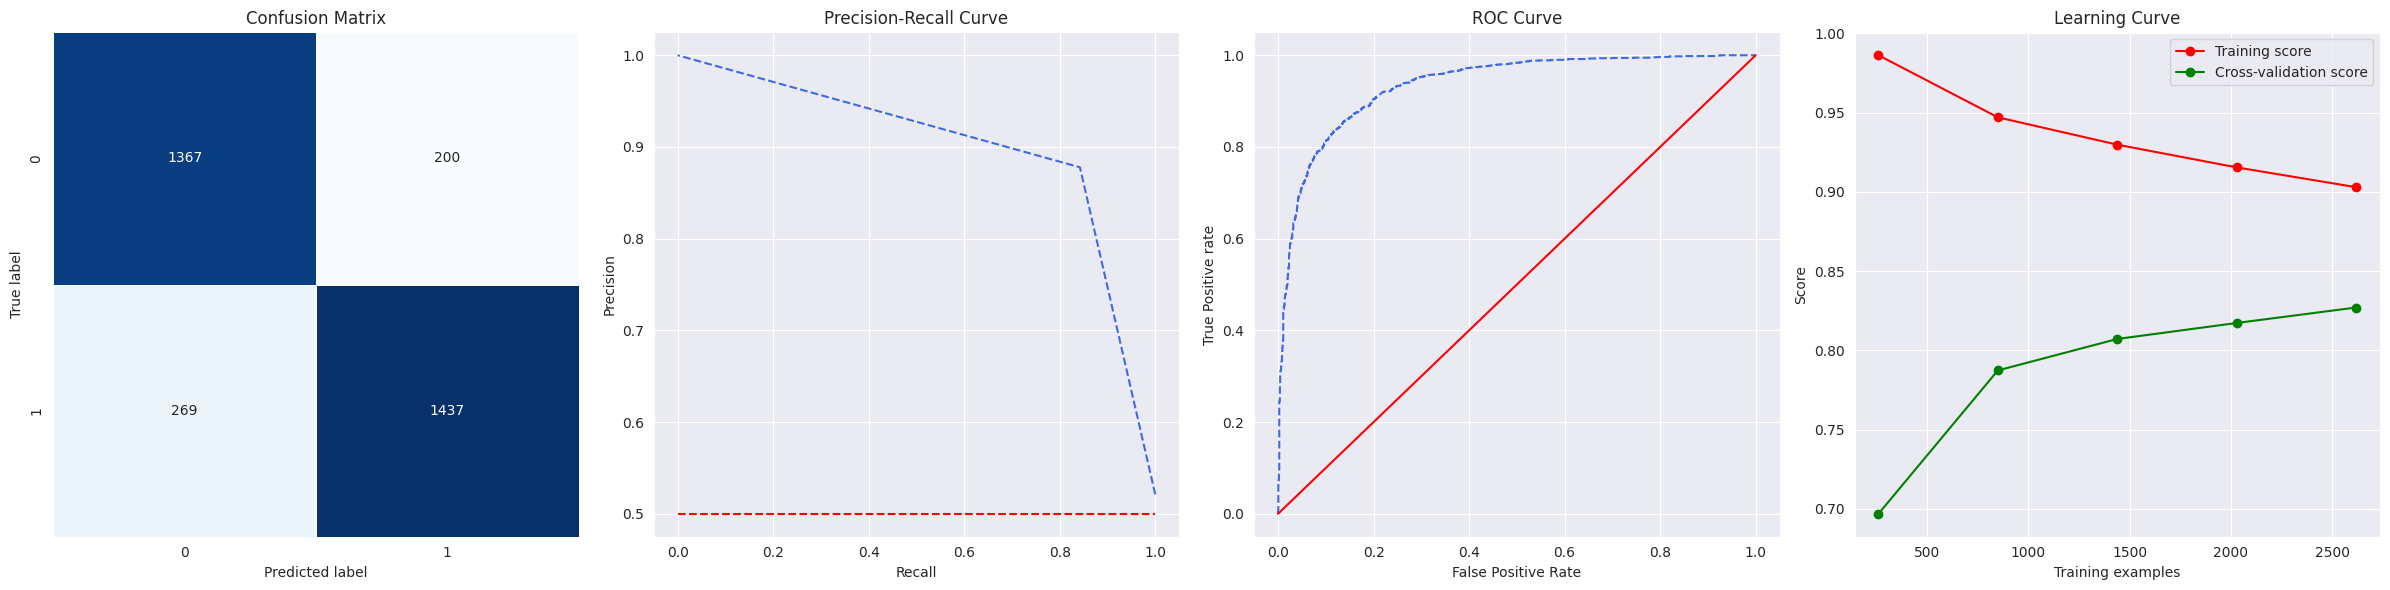

[Naive Bayes]
              precision    recall  f1-score   support

           0       0.84      0.83      0.83      1567
           1       0.84      0.85      0.85      1706

    accuracy                           0.84      3273
   macro avg       0.84      0.84      0.84      3273
weighted avg       0.84      0.84      0.84      3273



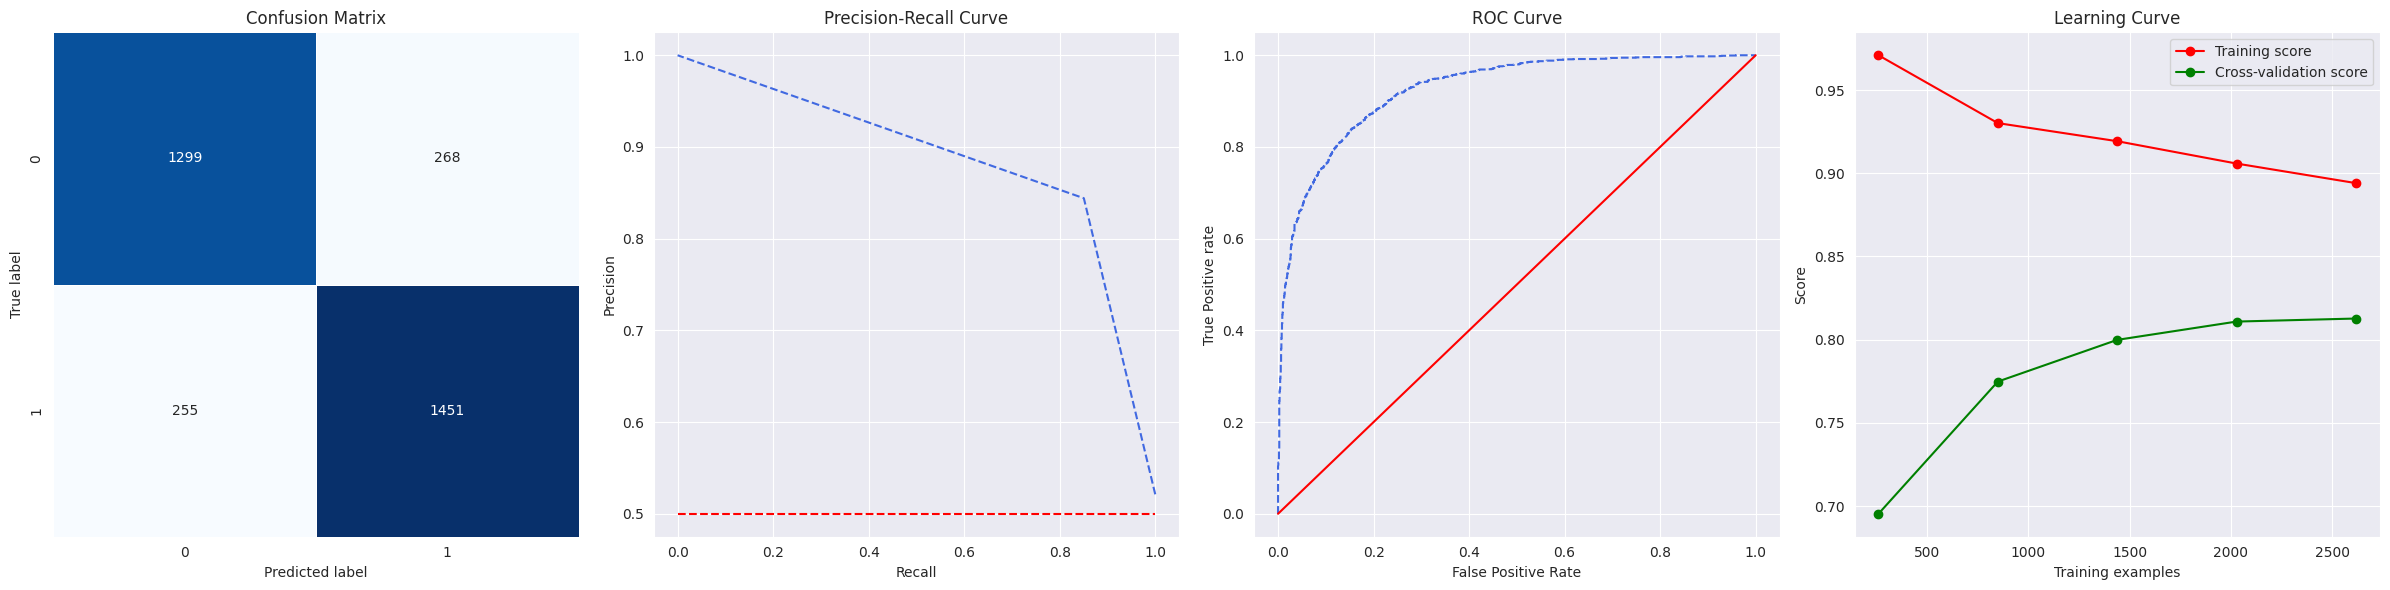

[Gaussian Naive Bayes]
              precision    recall  f1-score   support

           0       0.79      0.76      0.77      1567
           1       0.79      0.81      0.80      1706

    accuracy                           0.79      3273
   macro avg       0.79      0.79      0.79      3273
weighted avg       0.79      0.79      0.79      3273



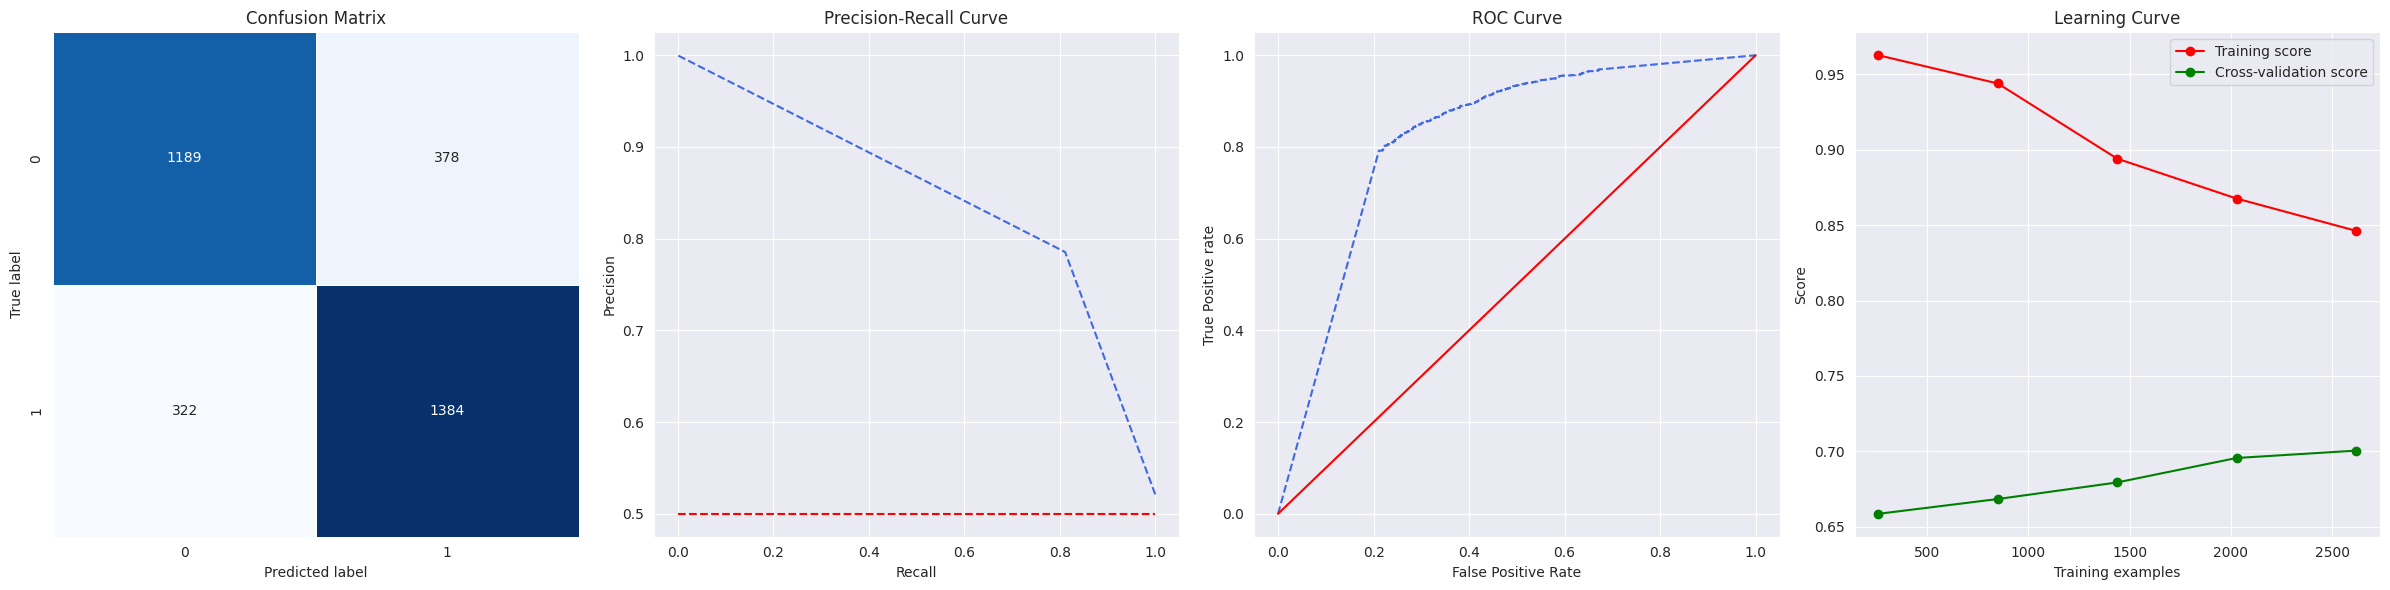

[KNN]
              precision    recall  f1-score   support

           0       0.80      0.30      0.43      1567
           1       0.59      0.93      0.72      1706

    accuracy                           0.63      3273
   macro avg       0.70      0.62      0.58      3273
weighted avg       0.69      0.63      0.58      3273



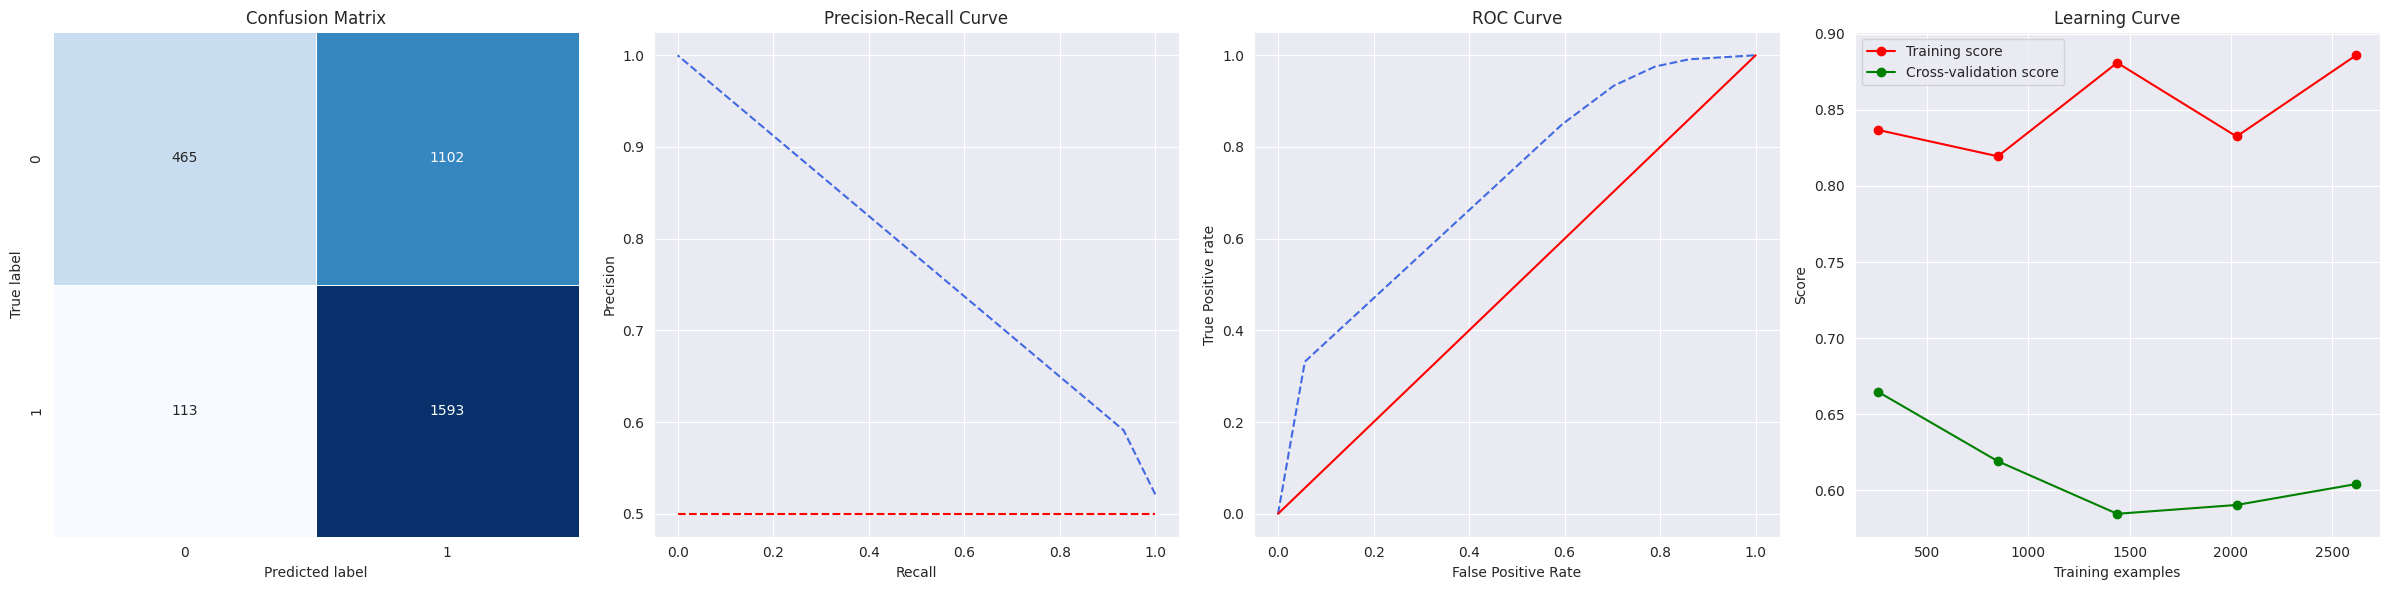

[LightGBM]
              precision    recall  f1-score   support

           0       0.82      0.88      0.85      1567
           1       0.88      0.83      0.85      1706

    accuracy                           0.85      3273
   macro avg       0.85      0.85      0.85      3273
weighted avg       0.85      0.85      0.85      3273



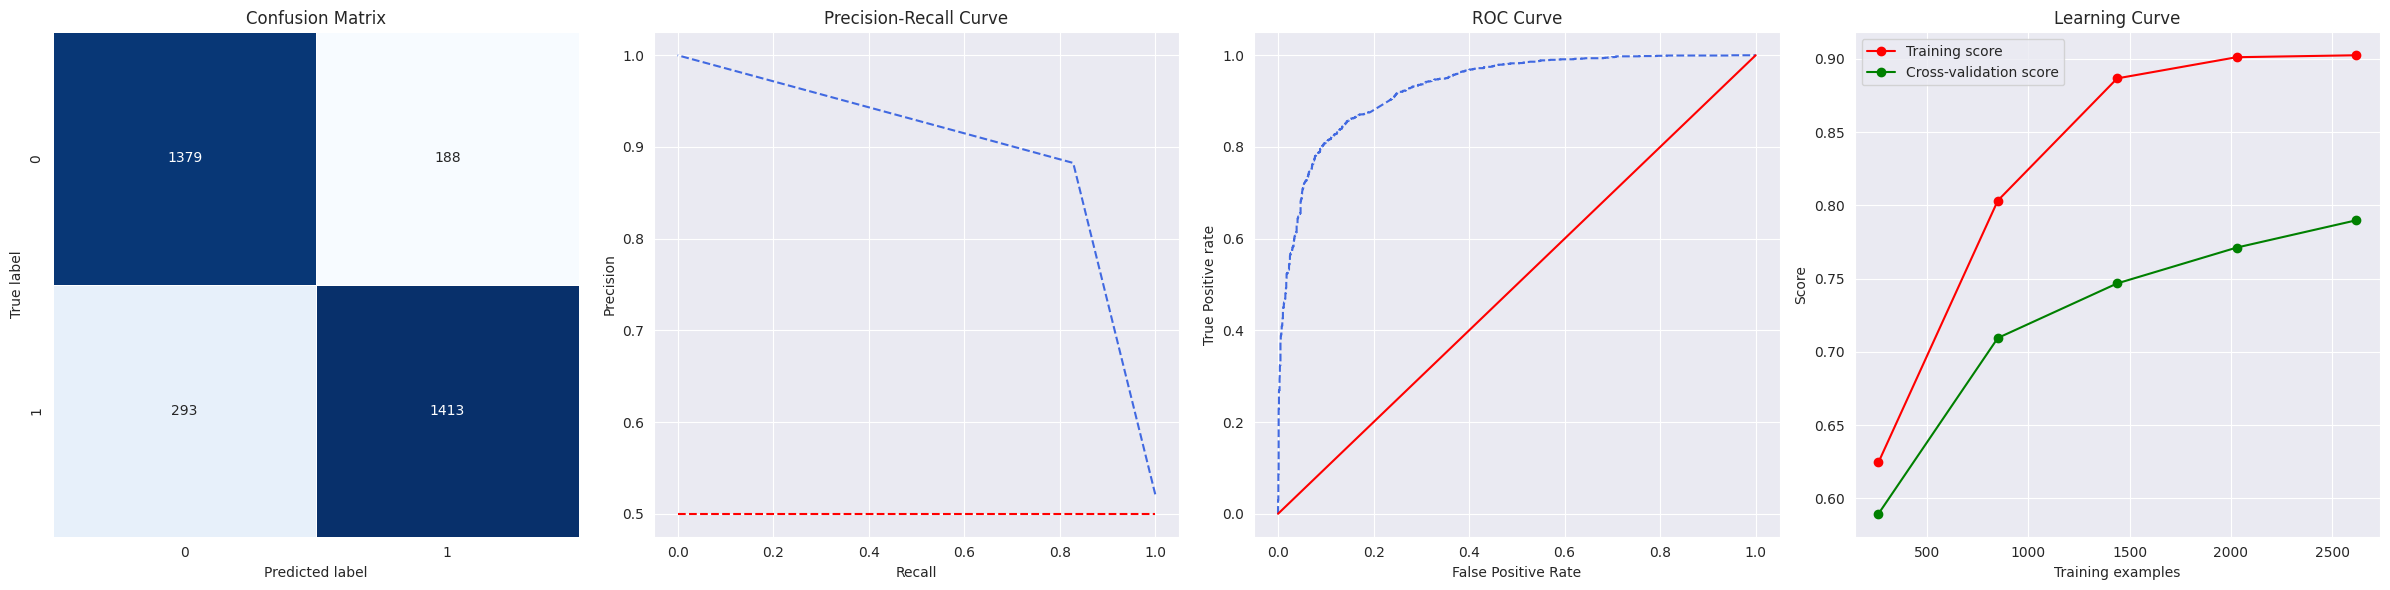

[SimpleRNN]
103/103 [==============================] - 0s 2ms/step
Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_4 (Embedding)     (None, 8, 24)             298728    
                                                                 
 simple_rnn_1 (SimpleRNN)    (None, 24)                1176      
                                                                 
 dense_4 (Dense)             (None, 1)                 25        
                                                                 
Total params: 299929 (1.14 MB)
Trainable params: 299929 (1.14 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None

Scores
Recall: 0.8515228426395939
Precision: 0.7866354044548651
F1: 0.8172916218589813
Accuracy: 0.817293003360831



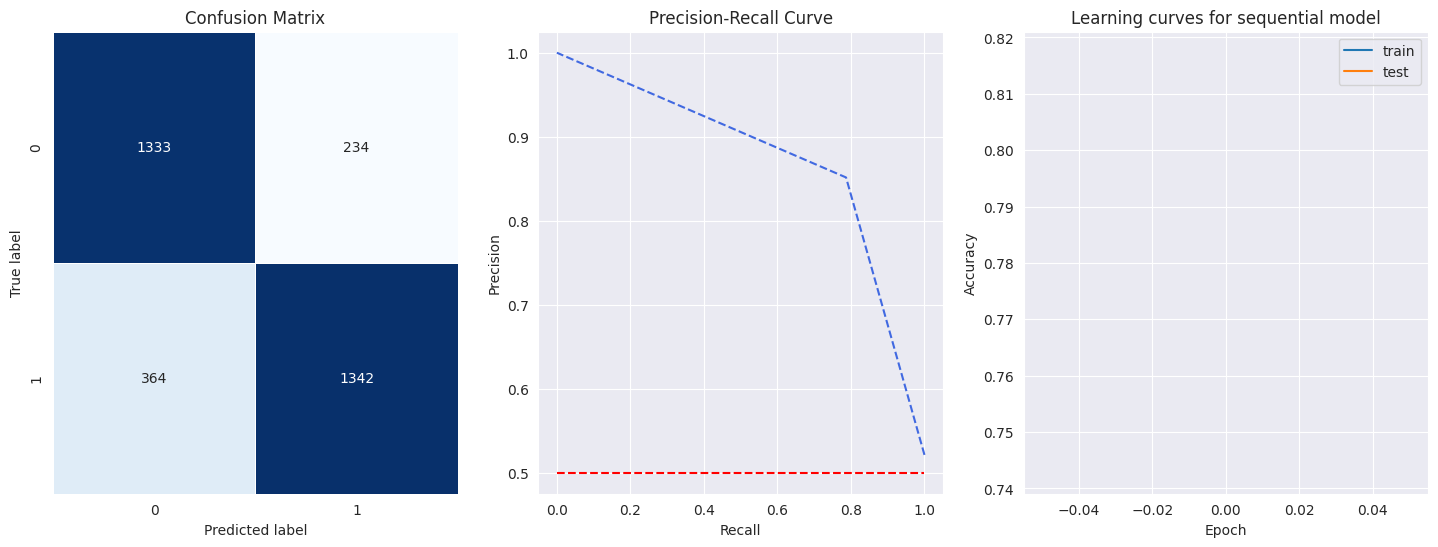

[LSTM]
103/103 [==============================] - 1s 4ms/step
Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_5 (Embedding)     (None, 8, 24)             298728    
                                                                 
 lstm_2 (LSTM)               (None, 32)                7296      
                                                                 
 dense_5 (Dense)             (None, 1)                 33        
                                                                 
Total params: 306057 (1.17 MB)
Trainable params: 306057 (1.17 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None

Scores
Recall: 0.8478130617136009
Precision: 0.8294255568581477
F1: 0.833324222993097
Accuracy: 0.8334860983806905



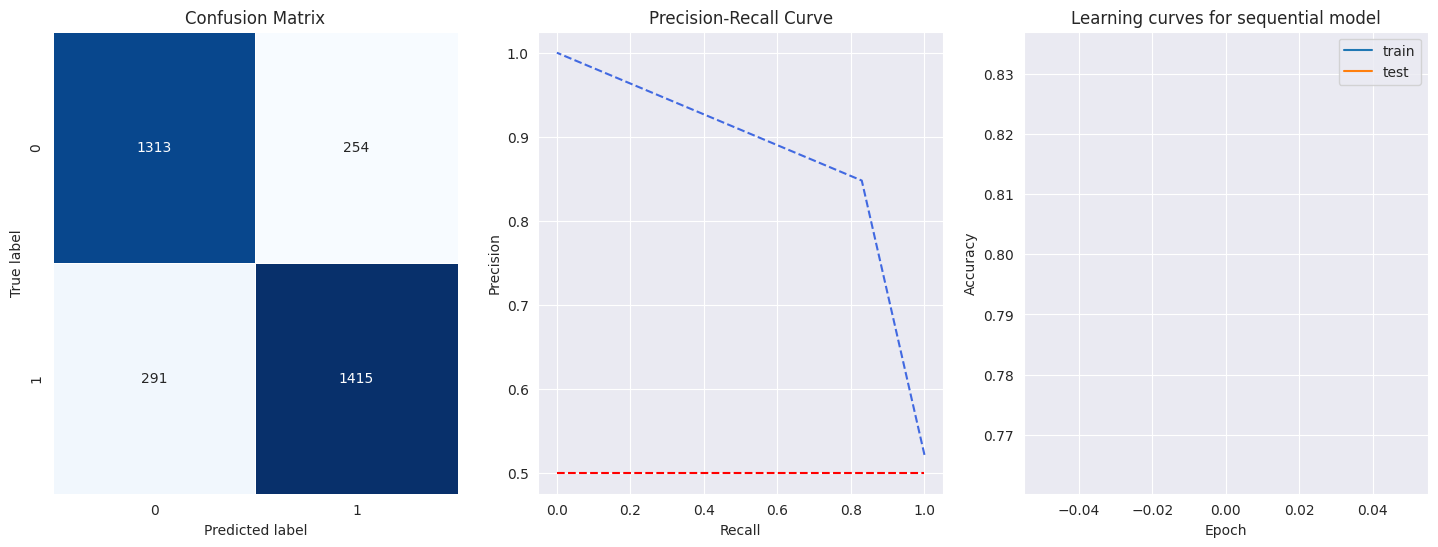

[BI-LSTM]
103/103 [==============================] - 1s 5ms/step
Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_6 (Embedding)     (None, 8, 128)            1593216   
                                                                 
 bidirectional_1 (Bidirecti  (None, 128)               98816     
 onal)                                                           
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_6 (Dense)             (None, 1)                 129       
                                                                 
Total params: 1692161 (6.46 MB)
Trainable params: 1692161 (6.46 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None

Scores
Reca

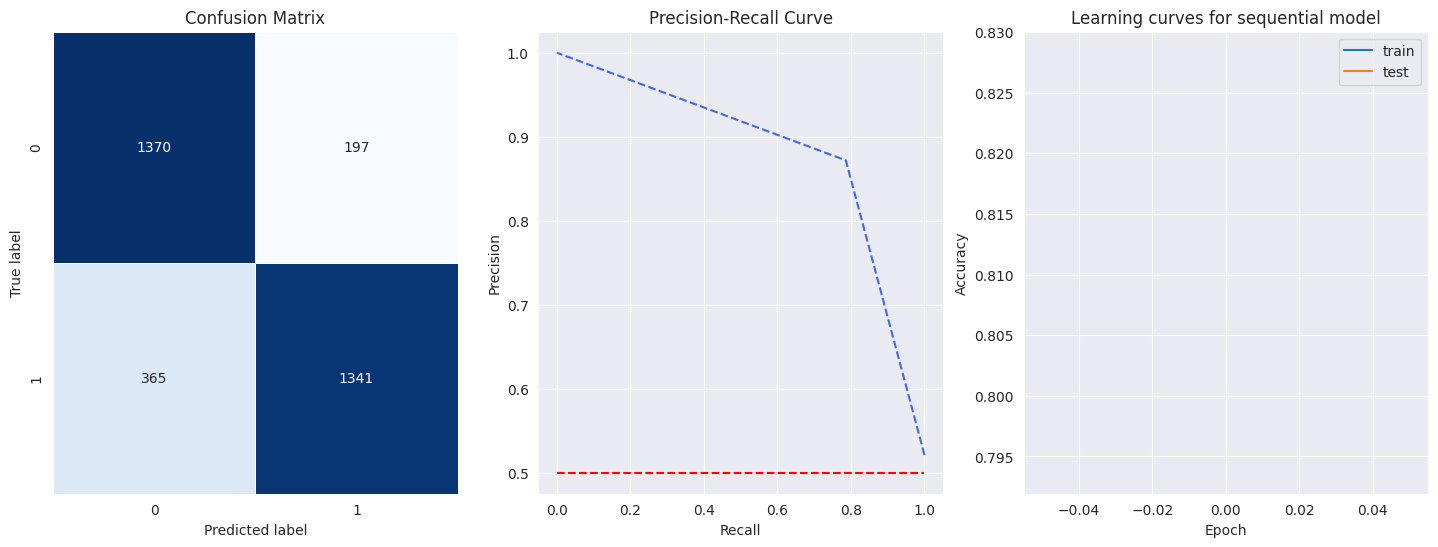

[GRU]
103/103 [==============================] - 1s 3ms/step
Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_7 (Embedding)     (None, 8, 24)             298728    
                                                                 
 gru_1 (GRU)                 (None, 24)                3600      
                                                                 
 dense_7 (Dense)             (None, 1)                 25        
                                                                 
Total params: 302353 (1.15 MB)
Trainable params: 302353 (1.15 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None

Scores
Recall: 0.8350574712643678
Precision: 0.8516998827667057
F1: 0.8345515136764459
Accuracy: 0.8350137488542622



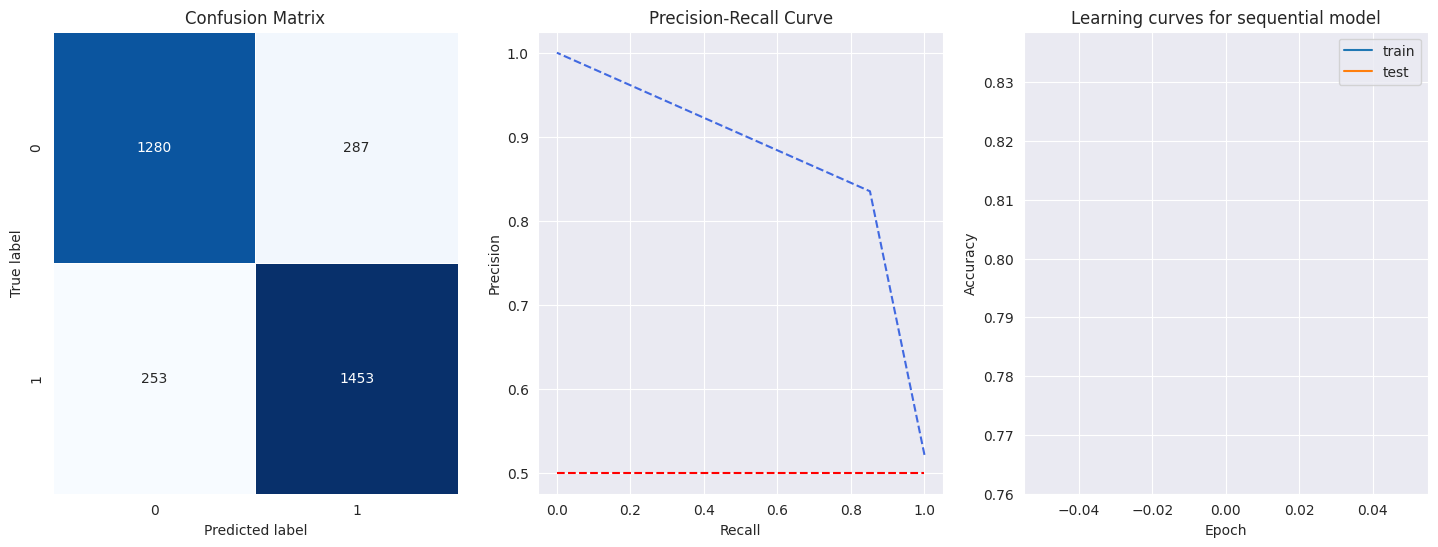

In [ ]:
from sklearn.metrics import classification_report
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, Dense, Dropout, LSTM, Bidirectional, GRU
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB, GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from lightgbm import LGBMClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_curve
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, confusion_matrix, precision_recall_curve
from sklearn.feature_extraction.text import TfidfVectorizer
import keras
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split, learning_curve, validation_curve
import numpy as np

def plot_results3(name, model, X_test, Y_test, predictions, history):
    mtx = confusion_matrix(Y_test, predictions)
    plt.figure(figsize=(24,6))
    plt.subplot(141)
    plt.title('Confusion Matrix')
    sns.heatmap(mtx, annot=True, fmt='d', linewidths=.5, cmap="Blues", cbar=False)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

    precision, recall, _ = precision_recall_curve(Y_test, predictions)
    plt.subplot(142)
    plt.plot(recall, precision, linestyle='--', color='royalblue')
    plt.plot([0, 1], [0.5, 0.5], linestyle='--', color='red') # Adding baseline
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision-Recall Curve')

    # roc curve for tpr = fpr
    if name not in ['SimpleRNN', 'LSTM', 'BI-LSTM', 'GRU']: #predict_proba is not available for sequential models.
      random_probs = [0 for i in range(len(Y_test))]
      p_fpr, p_tpr, _ = roc_curve(Y_test, random_probs, pos_label=1)
      pred_prob = model.predict_proba(X_test)
      fpr, tpr, thresh = roc_curve(Y_test, pred_prob[:,1], pos_label=1)
      plt.subplot(143)
      plt.plot(fpr, tpr, linestyle='--',color='royalblue')
      plt.plot(p_fpr, p_tpr, color='red')
      # title
      plt.title('ROC Curve')
      # x label
      plt.xlabel('False Positive Rate')
      # y label
      plt.ylabel('True Positive rate')
      plt.savefig('ROC',dpi=300)
      plt.tight_layout(pad=1.20)

      #  Learning curve
      train_sizes, train_scores, test_scores = learning_curve(model, X_test, Y_test)
      train_scores_mean = np.mean(train_scores, axis=1)
      test_scores_mean = np.mean(test_scores, axis=1)
      plt.subplot(144)
      plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
      plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")
      plt.xlabel('Training examples')
      plt.ylabel('Score')
      plt.title('Learning Curve')
      plt.legend(loc="best")
      plt.tight_layout()
    else:
      plt.subplot(143)
      plt.plot(history.history['accuracy'], label='train')
      plt.plot(history.history['val_accuracy'], label='test')
      plt.title('Learning curves for sequential model')
      plt.xlabel('Epoch')
      plt.ylabel('Accuracy')
      plt.legend()
    plt.show()

def performance_metrices(model, Y_test, predictions):
      accuracy = accuracy_score(Y_test, predictions)
      f1 = f1_score(Y_test, predictions, average='macro')
      recall_sc = recall_score(Y_test, predictions)
      precision_sc = precision_score(Y_test, predictions)
      print(model.summary())
      print('\nScores')
      print(f'Recall: {precision_sc}')
      print(f'Precision: {recall_sc}')
      print(f'F1: {f1}')
      print(f'Accuracy: {accuracy}\n')

# Split Data into Train and Validation Sets (80% Train, 20% Test)
X = df['LS'].values
Y = df['sentiment'].values
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.20, random_state=124)

# Vectorization for the Classifier Models
vectorizer = TfidfVectorizer(max_features=1000)
X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)

# Setting the parameters for the Sequential Model, sequencing and encoding
t = Tokenizer()
t.fit_on_texts(X_train)
vocab_size = len(t.word_index) + 1
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10)

encoded_train = t.texts_to_sequences(X_train)
encoded_test = t.texts_to_sequences(X_test)

max_length = 8
padded_train = pad_sequences(encoded_train, maxlen=max_length, padding='post')
padded_test = pad_sequences(encoded_test, maxlen=max_length, padding='post')

models = {
    'Logistic Regression': LogisticRegression(),
    'Naive Bayes': MultinomialNB(),
    'Gaussian Naive Bayes': GaussianNB(),
    'KNN': KNeighborsClassifier(),
    'LightGBM': LGBMClassifier(verbose=-1),
    'SimpleRNN': Sequential([
        Embedding(vocab_size, 24, input_length=max_length),
        SimpleRNN(24, return_sequences=False),
        Dense(1, activation='sigmoid')
    ]),
    'LSTM': Sequential([
        Embedding(vocab_size, 24, input_length=max_length),
        LSTM(32),
        Dense(1, activation='sigmoid')
    ]),
    'BI-LSTM': Sequential([
        Embedding(vocab_size, 128, input_length=max_length),
        Bidirectional(LSTM(64)),
        Dropout(0.5),
        Dense(1, activation='sigmoid')
    ]),
    'GRU': Sequential([
        Embedding(vocab_size, 24, input_length=max_length),
        GRU(24, return_sequences=False),
        Dense(1, activation='sigmoid')
    ])
}

for name, model in models.items():
    print('='*160)
    print(f'[{name}]')
    if name in ['SimpleRNN', 'LSTM', 'BI-LSTM', 'GRU']:
        model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
        history=model.fit(x=padded_train,
                  y=Y_train,
                  epochs=1,
                  validation_data=(padded_test, Y_test), verbose=1,
                  callbacks=[early_stop]
                  )
        predictions= (model.predict(padded_test)>0.5).astype("int32")
        performance_metrices(model, Y_test, predictions)
        plot_results3(name, model, padded_test, Y_test, predictions, history)
    elif name == 'Gaussian Naive Bayes':
        model.fit(X_train_vectorized.toarray(), Y_train)
        predictions = model.predict(X_test_vectorized.toarray())
        print(classification_report(Y_test, predictions))
        plot_results3(name, model, X_test_vectorized.toarray(), Y_test, predictions, None)
    else:
        model.fit(X_train_vectorized, Y_train)
        predictions = model.predict(X_test_vectorized)
        print(classification_report(Y_test, predictions))
        plot_results3(name, model, X_test_vectorized, Y_test, predictions, None) # None, History is only available for Sequential Model

[Logistic Regression]
              precision    recall  f1-score   support

           0       0.83      0.87      0.85      1567
           1       0.88      0.83      0.86      1706

    accuracy                           0.85      3273
   macro avg       0.85      0.85      0.85      3273
weighted avg       0.85      0.85      0.85      3273



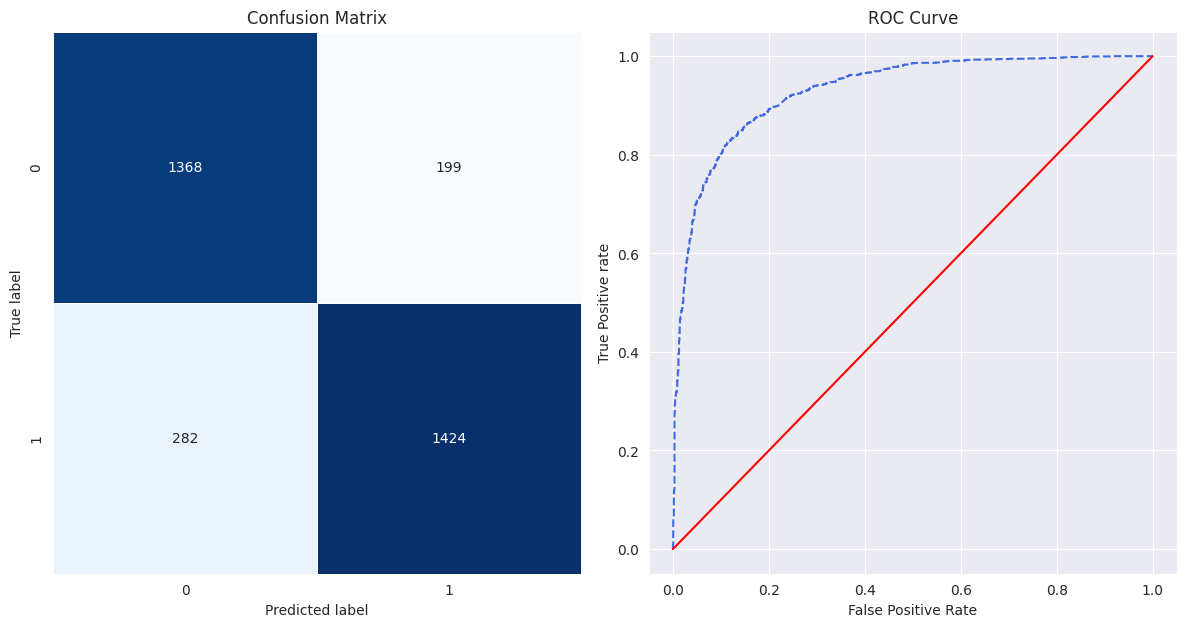

[Naive Bayes]
              precision    recall  f1-score   support

           0       0.84      0.83      0.83      1567
           1       0.84      0.85      0.85      1706

    accuracy                           0.84      3273
   macro avg       0.84      0.84      0.84      3273
weighted avg       0.84      0.84      0.84      3273



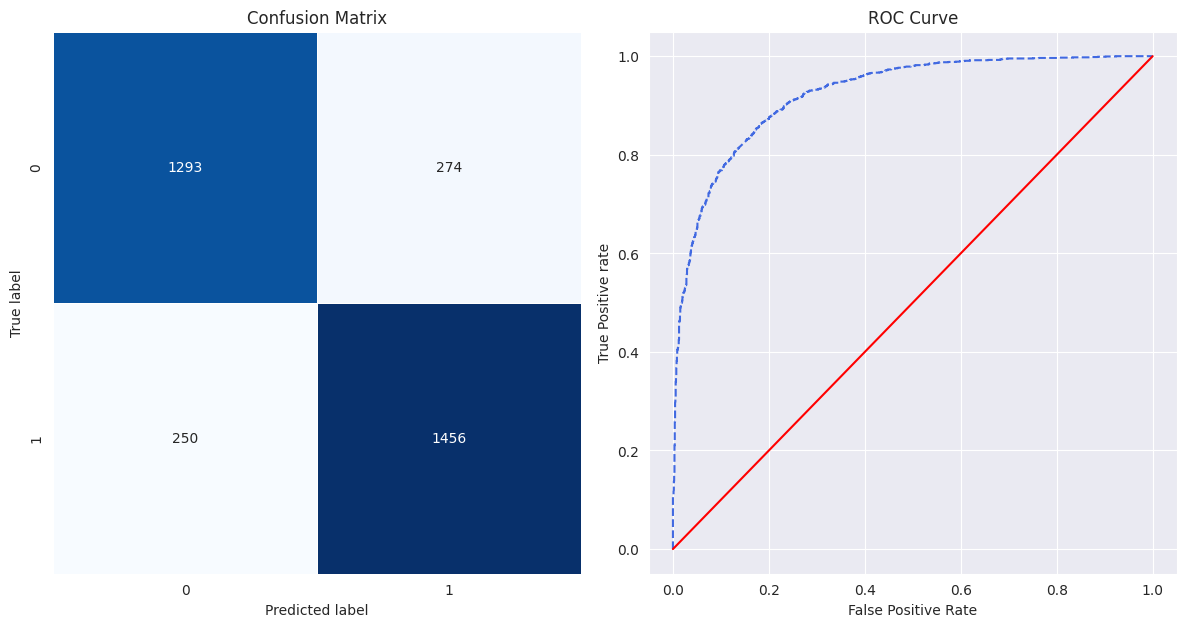

[Gaussian Naive Bayes]
              precision    recall  f1-score   support

           0       0.80      0.74      0.77      1567
           1       0.78      0.83      0.80      1706

    accuracy                           0.79      3273
   macro avg       0.79      0.78      0.78      3273
weighted avg       0.79      0.79      0.79      3273



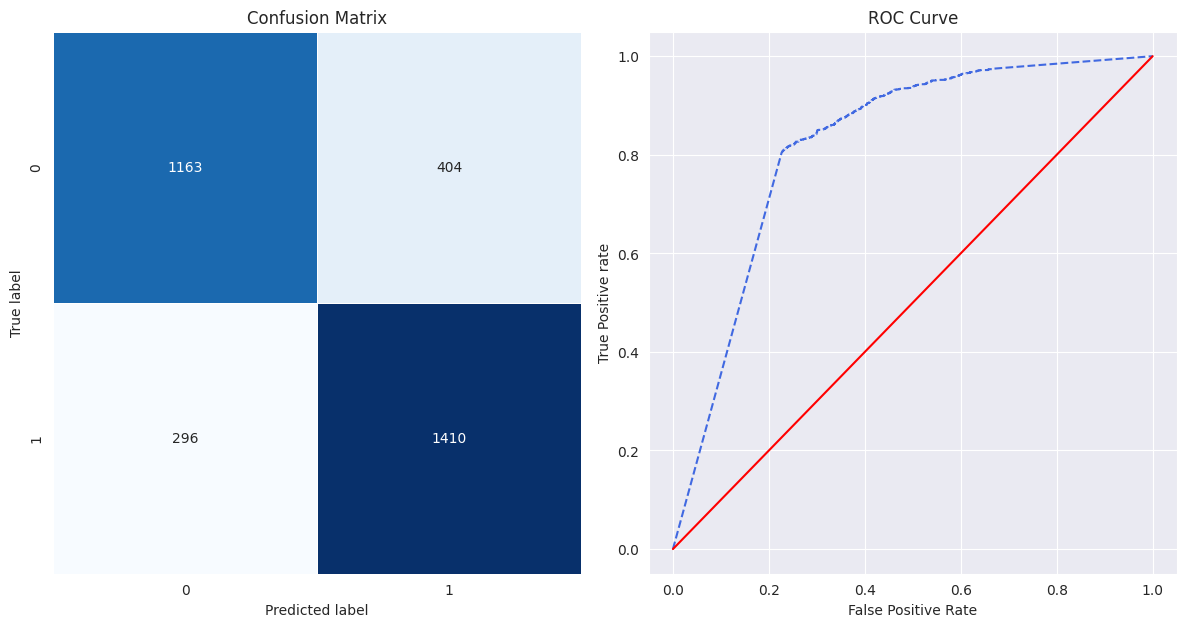

[KNN]
              precision    recall  f1-score   support

           0       0.79      0.39      0.52      1567
           1       0.62      0.90      0.73      1706

    accuracy                           0.66      3273
   macro avg       0.70      0.65      0.63      3273
weighted avg       0.70      0.66      0.63      3273



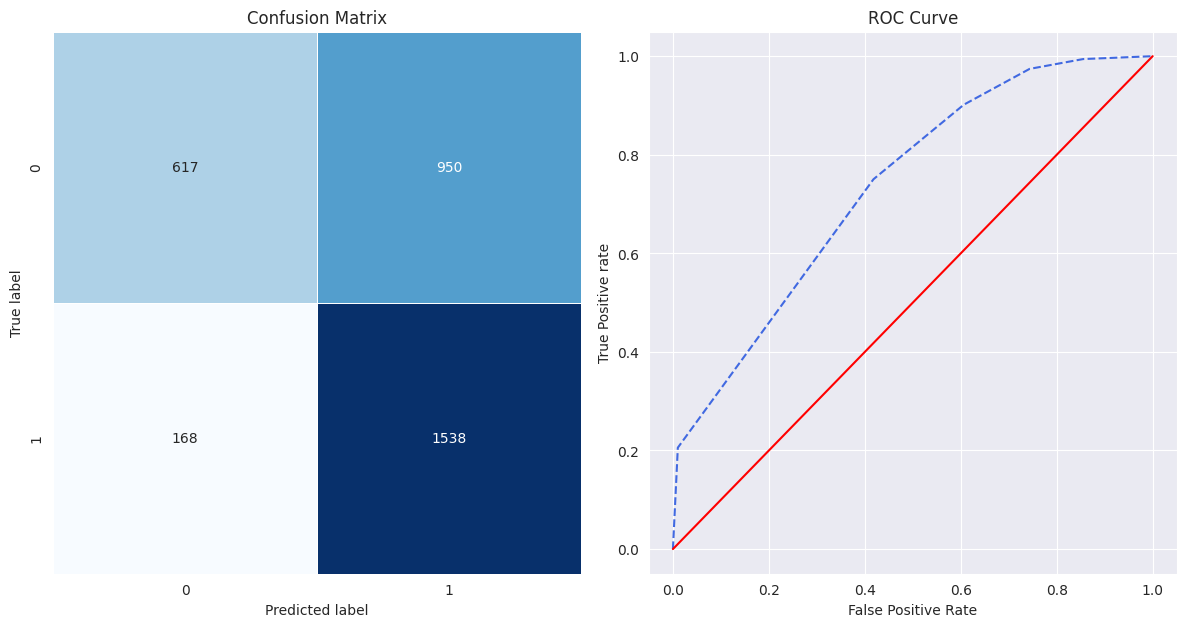

[LightGBM]
[LightGBM] [Info] Number of positive: 6876, number of negative: 6214
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.053566 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 21960
[LightGBM] [Info] Number of data points in the train set: 13090, number of used features: 755
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.525286 -> initscore=0.101232
[LightGBM] [Info] Start training from score 0.101232
              precision    recall  f1-score   support

           0       0.81      0.88      0.85      1567
           1       0.88      0.81      0.85      1706

    accuracy                           0.85      3273
   macro avg       0.85      0.85      0.85      3273
weighted avg       0.85      0.85      0.85      3273



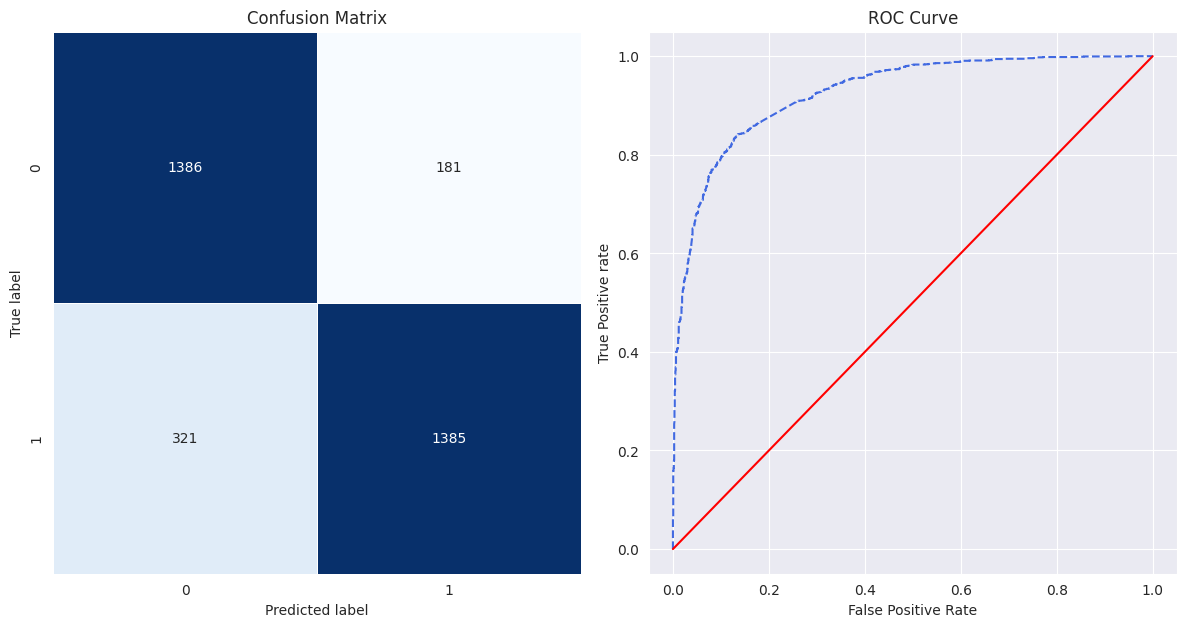

[SimpleRNN]
103/103 [==============================] - 0s 2ms/step
Model: "sequential_115"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_116 (Embedding)   (None, 8, 24)             373320    
                                                                 
 simple_rnn_33 (SimpleRNN)   (None, 24)                1176      
                                                                 
 dense_115 (Dense)           (None, 1)                 25        
                                                                 
Total params: 374521 (1.43 MB)
Trainable params: 374521 (1.43 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None

Scores
Recall: 0.8314997104806022
Precision: 0.8417350527549824
F1: 0.8281870310919068
Accuracy: 0.8285976168652612



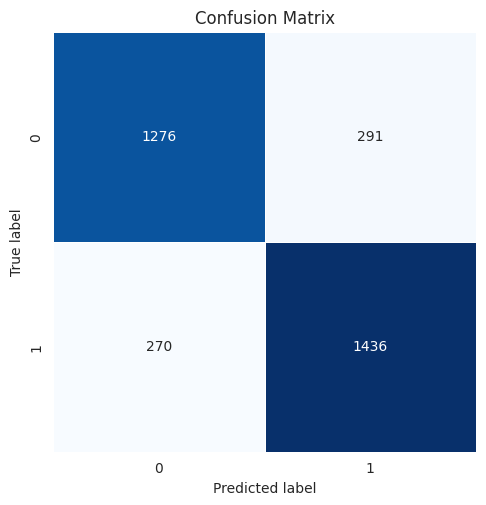

[LSTM]
103/103 [==============================] - 1s 2ms/step
Model: "sequential_116"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_117 (Embedding)   (None, 8, 24)             373320    
                                                                 
 lstm_51 (LSTM)              (None, 32)                7296      
                                                                 
 dense_116 (Dense)           (None, 1)                 33        
                                                                 
Total params: 380649 (1.45 MB)
Trainable params: 380649 (1.45 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None

Scores
Recall: 0.8685034439574202
Precision: 0.8130128956623681
F1: 0.8383609999935585
Accuracy: 0.8383745798961197



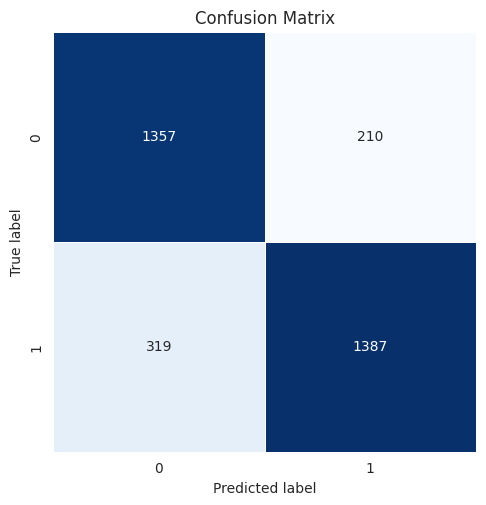

[BI-LSTM]
103/103 [==============================] - 3s 5ms/step
Model: "sequential_117"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_118 (Embedding)   (None, 8, 128)            1991040   
                                                                 
 bidirectional_18 (Bidirect  (None, 128)               98816     
 ional)                                                          
                                                                 
 dropout_18 (Dropout)        (None, 128)               0         
                                                                 
 dense_117 (Dense)           (None, 1)                 129       
                                                                 
Total params: 2089985 (7.97 MB)
Trainable params: 2089985 (7.97 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None

Scores
Re

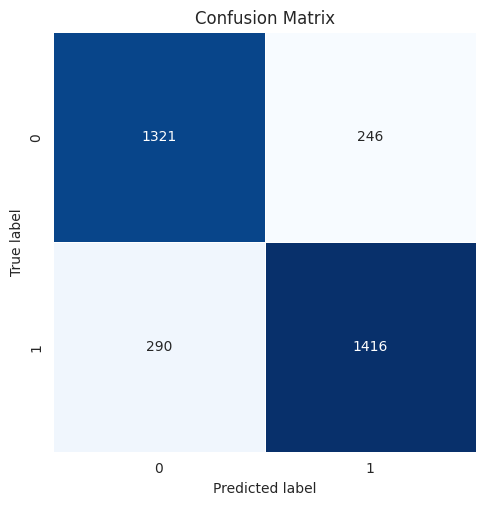

[GRU]
103/103 [==============================] - 1s 3ms/step
Model: "sequential_118"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_119 (Embedding)   (None, 8, 24)             373320    
                                                                 
 gru_31 (GRU)                (None, 24)                3600      
                                                                 
 dense_118 (Dense)           (None, 1)                 25        
                                                                 
Total params: 376945 (1.44 MB)
Trainable params: 376945 (1.44 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None

Scores
Recall: 0.8736842105263158
Precision: 0.7784290738569754
F1: 0.8258119271879834
Accuracy: 0.8258478460128322



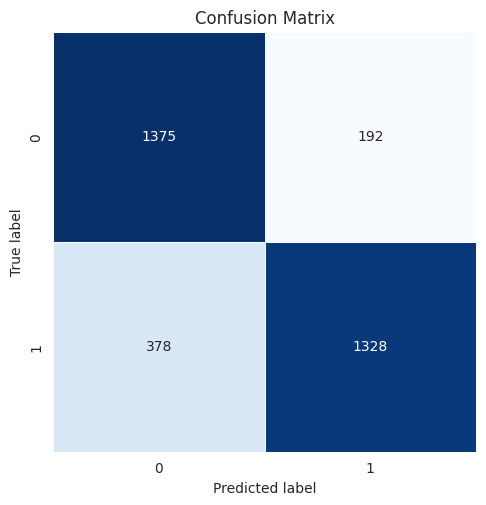

In [ ]:
from sklearn.metrics import classification_report
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, Dense, LSTM, Bidirectional, GRU
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB, GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from lightgbm import LGBMClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_curve
from sklearn.metrics import accuracy_score, f1_score, recall_score, confusion_matrix
from sklearn.feature_extraction.text import TfidfVectorizer
import keras
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

def plot_results2(name, model, X_test, Y_test, predictions):
    mtx = confusion_matrix(Y_test, predictions)
    plt.figure(figsize=(12,12))
    plt.subplot(221)
    plt.title('Confusion Matrix')
    sns.heatmap(mtx, annot=True, fmt='d', linewidths=.5, cmap="Blues", cbar=False)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

    # roc curve for tpr = fpr
    if name not in ['SimpleRNN', 'LSTM', 'BI-LSTM', 'GRU']: #predict_proba is not available for sequential models.
      random_probs = [0 for i in range(len(Y_test))]
      p_fpr, p_tpr, _ = roc_curve(Y_test, random_probs, pos_label=1)
      pred_prob = model.predict_proba(X_test)
      fpr, tpr, thresh = roc_curve(Y_test, pred_prob[:,1], pos_label=1)
      plt.subplot(222)
      plt.plot(fpr, tpr, linestyle='--',color='royalblue')
      plt.plot(p_fpr, p_tpr, color='red')
      # title
      plt.title('ROC Curve')
      # x label
      plt.xlabel('False Positive Rate')
      # y label
      plt.ylabel('True Positive rate')
      plt.savefig('ROC',dpi=300)
      plt.tight_layout(pad=1.20)
    plt.show();

def performance_metrices(model, Y_test, predictions):
      accuracy = accuracy_score(Y_test, predictions)
      f1 = f1_score(Y_test, predictions, average='macro')
      recall_sc = recall_score(Y_test, predictions)
      precision_sc = precision_score(Y_test, predictions)
      print(model.summary())
      print('\nScores')
      print(f'Recall: {precision_sc}')
      print(f'Precision: {recall_sc}')
      print(f'F1: {f1}')
      print(f'Accuracy: {accuracy}\n')

# Split Data into Train and Validation Sets (80% Train, 20% Test)
X = df['tweet P'].values
Y = df['sentiment'].values
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.20, random_state=124)

# Vectorization for the Classifier Models
vectorizer = TfidfVectorizer(max_features=1000)
X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)

# Setting the parameters for the Sequential Model, sequencing and encoding
t = Tokenizer()
t.fit_on_texts(X_train)
vocab_size = len(t.word_index) + 1
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10)

encoded_train = t.texts_to_sequences(X_train)
encoded_test = t.texts_to_sequences(X_test)

max_length = 8
padded_train = pad_sequences(encoded_train, maxlen=max_length, padding='post')
padded_test = pad_sequences(encoded_test, maxlen=max_length, padding='post')

models = {
    'Logistic Regression': LogisticRegression(),
    'Naive Bayes': MultinomialNB(),
    'Gaussian Naive Bayes': GaussianNB(),
    'KNN': KNeighborsClassifier(),
    'LightGBM': LGBMClassifier(),
    'SimpleRNN': Sequential([
        Embedding(vocab_size, 24, input_length=max_length),
        SimpleRNN(24, return_sequences=False),
        Dense(1, activation='sigmoid')
    ]),
    'LSTM': Sequential([
        Embedding(vocab_size, 24, input_length=max_length),
        LSTM(32),
        Dense(1, activation='sigmoid')
    ]),
    'BI-LSTM': Sequential([
        Embedding(vocab_size, 128, input_length=max_length),
        Bidirectional(LSTM(64)),
        Dropout(0.5),
        Dense(1, activation='sigmoid')
    ]),
    'GRU': Sequential([
        Embedding(vocab_size, 24, input_length=max_length),
        GRU(24, return_sequences=False),
        Dense(1, activation='sigmoid')
    ])
}

for name, model in models.items():
    print('='*160)
    print(f'[{name}]')
    if name in ['SimpleRNN', 'LSTM', 'BI-LSTM', 'GRU']:
        model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
        model.fit(x=padded_train,
                  y=Y_train,
                  epochs=1,
                  validation_data=(padded_test, Y_test), verbose=1,
                  callbacks=[early_stop]
                  )
        predictions= (model.predict(padded_test)>0.5).astype("int32")
        performance_metrices(model, Y_test, predictions)
        plot_results2(name, model, padded_test, Y_test, predictions)
    elif name == 'Gaussian Naive Bayes':
        model.fit(X_train_vectorized.toarray(), Y_train)
        predictions = model.predict(X_test_vectorized.toarray())
        print(classification_report(Y_test, predictions))
        plot_results(name, model, X_test_vectorized.toarray(), Y_test, predictions)
    else:
        model.fit(X_train_vectorized, Y_train)
        predictions = model.predict(X_test_vectorized)
        print(classification_report(Y_test, predictions))
        plot_results(name, model, X_test_vectorized, Y_test, predictions)

In [ ]:
from sklearn.metrics import classification_report
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, Dense, LSTM, GRU
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB, GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from lightgbm import LGBMClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn import metrics

# Vectorization for the Classifier Models
vectorizer = TfidfVectorizer(max_features=1000)
X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)

# Setting the parameters for the Sequential Model, sequencing and encoding
t = Tokenizer()
t.fit_on_texts(X_train)
vocab_size = len(t.word_index) + 1
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10)

encoded_train = t.texts_to_sequences(X_train)
encoded_test = t.texts_to_sequences(X_test)

max_length = 8
padded_train = pad_sequences(encoded_train, maxlen=max_length, padding='post')
padded_test = pad_sequences(encoded_test, maxlen=max_length, padding='post')

models = {
    'Logistic Regression': LogisticRegression(),
    'Naive Bayes': MultinomialNB(),
    'Gaussian Naive Bayes': GaussianNB(),
    'KNN': KNeighborsClassifier(),
    'LGBM': LGBMClassifier(),
    'SimpleRNN': Sequential([
        Embedding(vocab_size, 24, input_length=max_length),
        SimpleRNN(24, return_sequences=False),
        Dense(1, activation='sigmoid')
    ]),
    'LSTM': Sequential([
        Embedding(vocab_size, 24, input_length=max_length),
        LSTM(32),
        Dense(1, activation='sigmoid')
    ]),
    'GRU': Sequential([
        Embedding(vocab_size, 24, input_length=max_length),
        GRU(24, return_sequences=False),
        Dense(1, activation='sigmoid')
    ]),
}

for name, model in models.items():
    print('='*160)
    print(f'[{name}]')
    if name in ['SimpleRNN', 'LSTM', 'GRU']:
        model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
        model.fit(x=padded_train,
                  y=Y_train,
                  epochs=1,
                  validation_data=(padded_test, Y_test), verbose=1,
                  callbacks=[early_stop]
                  )
        predictions= (model.predict(padded_test)>0.5).astype("int32")
        performance_metrices(model, Y_test, predictions)
        plot_results(name, model, padded_test, Y_test, predictions)
    elif name == 'Gaussian Naive Bayes':
        model.fit(X_train_vectorized.toarray(), Y_train)
        predictions = model.predict(X_test_vectorized.toarray())
        print(classification_report(Y_test, predictions))
        plot_results(name, model, X_test_vectorized.toarray(), Y_test, predictions)
    else:
        model.fit(X_train_vectorized, Y_train)
        predictions = model.predict(X_test_vectorized)
        print(classification_report(Y_test, predictions))
        plot_results(name, model, X_test_vectorized, Y_test, predictions)

def plot_results(name, model, X_test, Y_test, predictions):
   mtx = confusion_matrix(Y_test, predictions)
   plt.figure(figsize=(12,12))
   plt.subplot(221)
   plt.title('Confusion Matrix')
   sns.heatmap(mtx, annot=True, fmt='d', linewidths=.5,
               cmap="Blues", cbar=False)
   plt.ylabel('True label')
   plt.xlabel('Predicted label')

   # roc curve for tpr = fpr
   if name not in ['SimpleRNN', 'LSTM', 'GRU']: #predict_proba is not available for sequential models.
     random_probs = [0 for i in range(len(Y_test))]
     p_fpr, p_tpr, _ = roc_curve(Y_test, random_probs, pos_label=1)
     pred_prob = model.predict_proba(X_test)
     fpr, tpr, thresh = roc_curve(Y_test, pred_prob[:,1], pos_label=1)
     plt.subplot(222)
     plt.plot(fpr, tpr, linestyle='--',color='royalblue')
     plt.plot(p_fpr, p_tpr, color='red')
     # title
     plt.title('ROC Curve')
     # x label
     plt.xlabel('False Positive Rate')
     # y label
     plt.ylabel('True Positive rate')
     plt.savefig('ROC',dpi=300)
     plt.tight_layout(pad=1.20)
   plt.show();

def performance_metrices(model, Y_test, predictions):
      accuracy = accuracy_score(Y_test, predictions)
      f1 = f1_score(Y_test, predictions, average='macro')
      recall_sc = recall_score(Y_test, predictions)
      precision_sc = precision_score(Y_test, predictions)
      print(model.summary())
      print('\nScores')
      print(f'Recall: {precision_sc}')
      print(f'Precision: {recall_sc}')
      print(f'F1: {f1}')
      print(f'Accuracy: {accuracy}\n')


In [ ]:
# ONLY FOR TESTING
# Importing necessary Libraries for Modeling

# helps in text preprocessing
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer

# split data into train and test set
from sklearn.model_selection import train_test_split

# helps in model building
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import SimpleRNN, LSTM, GRU
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Embedding
from tensorflow.keras.callbacks import EarlyStopping

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, f1_score, recall_score
from sklearn.feature_extraction.text import TfidfVectorizer
import keras

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_curve

def plot_confusion_matrix(y_true, y_pred):
   mtx = confusion_matrix(y_true, y_pred)
   sns.heatmap(mtx, annot=True, fmt='d', linewidths=.5,
               cmap="Blues", cbar=False)
   plt.ylabel('True label')
   plt.xlabel('Predicted label')

def performance_metrices(model, Y_test, predictions):
      accuracy = accuracy_score(Y_test, predictions)
      f1 = f1_score(Y_test, predictions, average='macro')
      recall_sc = recall_score(Y_test, predictions)
      print('\nScore')
      print(f'Accuracy: {accuracy}')
      print(f'F1: {f1}')
      print(f'Recall: {recall_sc}\n')
      print(model.summary())

# Split Data into Train and Validation Sets (80% Train, 20% Test)
X = df['tweet P'].values
Y = df['sentiment'].values
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.20, random_state=124)

# You can adjust the number of features as needed max_feature=1000, Vecrtorization for the Classifier Models
vectorizer = TfidfVectorizer()
X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)

#Setting the parametters for the Sequential Model, sequencing and encoding
vocab_size = len(t.word_index) + 1
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10)
t = Tokenizer()
t.fit_on_texts(X_train)

encoded_train = t.texts_to_sequences(X_train)
encoded_test = t.texts_to_sequences(X_test)

max_length = 8
padded_train = pad_sequences(encoded_train, maxlen=max_length, padding='post')
padded_test = pad_sequences(encoded_test, maxlen=max_length, padding='post')

models = {
    'Logistic Regression': LogisticRegression(),
    'Naive Bayes': MultinomialNB(),
    'KNN': KNeighborsClassifier(),
    'SVC': SVC(),
    'LGBM': LGBMClassifier(),
    'SimpleRNN': Sequential([
        Embedding(vocab_size, 24, input_length=max_length),
        SimpleRNN(24, return_sequences=False),
        Dense(1, activation='sigmoid')
    ]),
    'LSTM': Sequential([
        Embedding(vocab_size, 24, input_length=max_length),
        LSTM(32),
        Dense(1, activation='sigmoid')
    ]),
    'GRU': Sequential([
        Embedding(vocab_size, 24, input_length=max_length),
        GRU(24, return_sequences=False),
        Dense(1, activation='sigmoid')
    ]),
}

for name, model in models.items():
    print('-'*100)
    print('-'*100)
    print(f'[{name}]')
    if name == 'SimpleRNN':
      model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])
      model.fit(x=padded_train,
         y=Y_train,
         epochs=10,
         validation_data=(padded_test, Y_test), verbose=1,
         callbacks=[early_stop]
         )
      predictions= (model.predict(padded_test)>0.5).astype("int32")
      performance_metrices(model, Y_test, predictions)
    elif name == 'LSTM' or name == 'GRU':
      model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
      model.fit(x=padded_train,
         y=Y_train,
         epochs=10,
         validation_data=(padded_test, Y_test), verbose=1,
         callbacks=[early_stop]
         )
      predictions= (model.predict(padded_test)>0.5).astype("int32")
      performance_metrices(model, Y_test, predictions)
    else:
      model.fit(X_train_vectorized, Y_train)
      predictions = model.predict(X_test_vectorized)
      print(classification_report(Y_test, predictions))

----------------------------------------------------------------------------------------------------
[Logistic Regression]
              precision    recall  f1-score   support

           0       0.84      0.88      0.86      1567
           1       0.89      0.85      0.87      1706

    accuracy                           0.87      3273
   macro avg       0.87      0.87      0.87      3273
weighted avg       0.87      0.87      0.87      3273

----------------------------------------------------------------------------------------------------
[Naive Bayes]
              precision    recall  f1-score   support

           0       0.87      0.83      0.85      1567
           1       0.85      0.88      0.87      1706

    accuracy                           0.86      3273
   macro avg       0.86      0.86      0.86      3273
weighted avg       0.86      0.86      0.86      3273

----------------------------------------------------------------------------------------------------
[KNN]
 

[[  445   131     0 ...     0     0     0]
 [    2     5    85 ...     5    31  3119]
 [ 1935   648   799 ...   502   283     0]
 ...
 [  121  2660   825 ...     1  1264 15108]
 [   25  3137     2 ...   130   165     0]
 [  116  3898   107 ...   353  3898  5564]]
------------------------------------------------------------------------------------------------------------------------------------------------------
[Logistic Regression]
Accuracy Score: 0.8652612282309807
F1 Score: 0.8651959939648904
Recall Score: 0.8511137162954279
------------------------------------------------------------------------------------------------------------------------------------------------------
[Naive Bayes]
Accuracy Score: 0.8564008554842653
F1 Score: 0.8558129237570917
Recall Score: 0.8827667057444314
------------------------------------------------------------------------------------------------------------------------------------------------------
[KNN]
Accuracy Score: 0.766269477543538
F1 Score: 0.7

RuntimeError: ignored

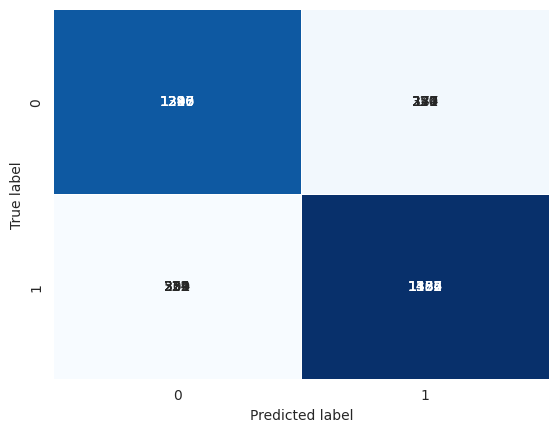

In [ ]:
# ONLY FOR TESTING
# Importing necessary Libraries for Modeling

# helps in text preprocessing
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer

# split data into train and test set
from sklearn.model_selection import train_test_split

# helps in model building
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import SimpleRNN, LSTM, GRU
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Embedding
from tensorflow.keras.callbacks import EarlyStopping

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, f1_score, recall_score, confusion_matrix
from sklearn.feature_extraction.text import TfidfVectorizer
import keras

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

def plot_confusion_matrix(y_true, y_pred):
   mtx = confusion_matrix(y_true, y_pred)
   sns.heatmap(mtx, annot=True, fmt='d', linewidths=.5,
               cmap="Blues", cbar=False)
   plt.ylabel('True label')
   plt.xlabel('Predicted label')

# Split Data into Train and Validation Sets (80% Train, 20% Test)
X = df['tweet P'].values
Y = df['sentiment'].values
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.20, random_state=124)

# You can adjust the number of features as needed max_feature=1000, Vecrtorization for the Classifier Models
vectorizer = TfidfVectorizer()
X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)

#Setting the parametters for the Sequential Model, sequencing and encoding
vocab_size = len(t.word_index) + 1
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10)
t = Tokenizer()
t.fit_on_texts(X_train)

encoded_train = t.texts_to_sequences(X_train)
encoded_test = t.texts_to_sequences(X_test)

max_length = 8
padded_train = pad_sequences(encoded_train, maxlen=max_length, padding='post')
padded_test = pad_sequences(encoded_test, maxlen=max_length, padding='post')
print(padded_train)

models = {
    'Logistic Regression': LogisticRegression(),
    'Naive Bayes': MultinomialNB(),
    'KNN': KNeighborsClassifier(),
    'SVC': SVC(),
    'LGBM': LGBMClassifier(),
    'SimpleRNN': Sequential([
        Embedding(vocab_size, 24, input_length=max_length),
        SimpleRNN(24, return_sequences=False),
        Dense(1, activation='sigmoid')
    ]),
    'LSTM': Sequential([
        Embedding(vocab_size, 24, input_length=max_length),
        LSTM(32),
        Dense(1, activation='sigmoid')
    ]),
    'GRU': Sequential([
        Embedding(vocab_size, 24, input_length=max_length),
        GRU(24, return_sequences=False),
        Dense(1, activation='sigmoid')
    ]),
}

for name, model in models.items():
    print('-'*150)
    print(f'[{name}]')
    if name == 'SimpleRNN':
      model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])
      model.fit(x=padded_train,
         y=Y_train,
         epochs=10,
         validation_data=(padded_test, Y_test), verbose=1,
         callbacks=[early_stop]
         )
      predictions= (model.predict(padded_test)>0.5).astype("int32")
      print(model.summary())
    elif name == 'LSTM':
      model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
      model.fit(x=padded_train,
         y=Y_train,
         epochs=10,
         validation_data=(padded_test, Y_test), verbose=1,
         callbacks=[early_stop]
         )
      predictions= (model.predict(padded_test)>0.5).astype("int32")
      print(model.summary())
    else:
      model.fit(X_train_vectorized, Y_train)
      predictions = model.predict(X_test_vectorized)
    #accuracy = accuracy_score(Y_test, predictions)
    #binary_predictions = [1 if prediction >= 0.5 else 0 for prediction in predictions]
    accuracy = accuracy_score(Y_test, predictions)
    f1 = f1_score(Y_test, predictions, average='macro')
    recall_sc = recall_score(Y_test, predictions)
    print(f'Accuracy Score: {accuracy}')
    print(f'F1 Score: {f1}')
    print(f'Recall Score: {recall_sc}')
    plot_confusion_matrix(Y_test, predictions)


In [ ]:
print(X_train.shape, Y_train.shape)
print(X_test.shape, Y_test.shape)

(13090,) (13090,)
(3273,) (3273,)


In [ ]:
encoded_train = t.texts_to_sequences(X_train)
encoded_test = t.texts_to_sequences(X_test)
print(encoded_train[0:3])

[[445, 131], [28, 4, 221, 2, 5, 85, 66, 2, 5, 31, 3119], [1935, 648, 799, 593, 192, 502, 283]]


In [ ]:
max_length = 8
padded_train = pad_sequences(encoded_train, maxlen=max_length, padding='post')
padded_test = pad_sequences(encoded_test, maxlen=max_length, padding='post')
print(padded_train)

[[  445   131     0 ...     0     0     0]
 [    2     5    85 ...     5    31  3119]
 [ 1935   648   799 ...   502   283     0]
 ...
 [  121  2660   825 ...     1  1264 15108]
 [   25  3137     2 ...   130   165     0]
 [  116  3898   107 ...   353  3898  5564]]


In [ ]:
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10)

# fit the model
model.fit(x=padded_train,
         y=Y_train,
         epochs=10,
         validation_data=(padded_test, Y_test), verbose=1,
         callbacks=[early_stop]
         )

Epoch 1/10
410/410 [==============================] - 18s 25ms/step - loss: 0.4655 - accuracy: 0.7684 - val_loss: 0.3778 - val_accuracy: 0.8298
Epoch 2/10
410/410 [==============================] - 8s 20ms/step - loss: 0.3112 - accuracy: 0.8702 - val_loss: 0.3828 - val_accuracy: 0.8365
Epoch 3/10
410/410 [==============================] - 5s 13ms/step - loss: 0.2567 - accuracy: 0.8972 - val_loss: 0.3942 - val_accuracy: 0.8332
Epoch 4/10
410/410 [==============================] - 7s 16ms/step - loss: 0.2106 - accuracy: 0.9213 - val_loss: 0.4165 - val_accuracy: 0.8387
Epoch 5/10
410/410 [==============================] - 6s 14ms/step - loss: 0.1756 - accuracy: 0.9339 - val_loss: 0.4477 - val_accuracy: 0.8378
Epoch 6/10
410/410 [==============================] - 5s 12ms/step - loss: 0.1416 - accuracy: 0.9487 - val_loss: 0.4841 - val_accuracy: 0.8139
Epoch 7/10
410/410 [==============================] - 8s 19ms/step - loss: 0.1133 - accuracy: 0.9605 - val_loss: 0.5114 - val_accuracy: 0.814

In [ ]:
vocab_size = len(t.word_index) + 1

# define the model
model = Sequential()
model.add(Embedding(vocab_size, 24, input_length=max_length)) #Victorizer (Dictionary)
model.add(SimpleRNN(24, return_sequences=False)) #Our Model
model.add(Dense(1, activation='sigmoid'))

# compile the model
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])
#model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# summarize the model
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 8, 24)             362640    
                                                                 
 simple_rnn (SimpleRNN)      (None, 24)                1176      
                                                                 
 dense (Dense)               (None, 1)                 25        
                                                                 
Total params: 363841 (1.39 MB)
Trainable params: 363841 (1.39 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


In [ ]:
# ONLY FOR TESTING
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, f1_score, recall_score
from sklearn.feature_extraction.text import TfidfVectorizer
import keras
'''
vectorizer = TfidfVectorizer() # You can adjust the number of features as needed max_feature=1000
X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)
'''
models = {
    'Logistic Regression': LogisticRegression(),
    'Naive Bayes': MultinomialNB(),
    'KNN': KNeighborsClassifier(),
    'SVC': SVC(),
    'LGBM': LGBMClassifier(),
    'SimpleRNN': Sequential([
        Embedding(vocab_size, 24, input_length=max_length),
        SimpleRNN(24, return_sequences=False),
        Dense(1, activation='sigmoid')
    ]),
    'LSTM': Sequential([
        Embedding(vocab_size, 24, input_length=max_length),
        LSTM(32),
        Dense(1, activation='sigmoid')
    ]),

}

for name, model in models.items():
    print('-'*200)
    print(f'[{name}]')
    if name == 'SimpleRNN':
      model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])
      model.fit(x=padded_train,
         y=Y_train,
         epochs=10,
         validation_data=(padded_test, Y_test), verbose=1,
         callbacks=[early_stop]
         )
      predictions= (model.predict(padded_test)>0.5).astype("int32")
    if name == 'LSTM':
      model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
      model.fit(x=padded_train,
         y=Y_train,
         epochs=10,
         validation_data=(padded_test, Y_test), verbose=1,
         callbacks=[early_stop]
         )
      predictions= (model.predict(padded_test)>0.5).astype("int32")
    else:
      model.fit(X_train_vectorized, Y_train)
      predictions = model.predict(X_test_vectorized)
    #accuracy = accuracy_score(Y_test, predictions)
    #binary_predictions = [1 if prediction >= 0.5 else 0 for prediction in predictions]
    accuracy = accuracy_score(Y_test, predictions)
    f1 = f1_score(Y_test, predictions, average='macro')
    recall_sc = recall_score(Y_test, predictions)
    print(f'Accuracy Score: {accuracy}')
    print(f'F1 Score: {f1}')
    print(f'Recall Score: {recall_sc}')

--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
[Logistic Regression]
Accuracy Score: 0.869233119462267
F1 Score: 0.8691876817662619
Recall Score: 0.870059880239521
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
[Naive Bayes]
Accuracy Score: 0.8545676749159792
F1 Score: 0.853972237677395
Recall Score: 0.9
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
[KNN]
Accuracy Score: 0.7626031164069661
F1 Score: 0.7619302781913142
Recall Score: 0.6952095808383234
----------------------------------------------------------------------------------

KeyboardInterrupt: ignored

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

def c_report(y_true, y_pred):
   print("Classification Report")
   print(classification_report(y_true, y_pred))
   acc_sc = accuracy_score(y_true, y_pred)
   print("Accuracy : "+ str(acc_sc))
   return acc_sc

def plot_confusion_matrix(y_true, y_pred):
   mtx = confusion_matrix(y_true, y_pred)
   sns.heatmap(mtx, annot=True, fmt='d', linewidths=.5,
               cmap="Blues", cbar=False)
   plt.ylabel('True label')
   plt.xlabel('Predicted label')

In [ ]:
preds = (model.predict(padded_test) > 0.5).astype("int32")

103/103 [==============================] - 0s 4ms/step


In [ ]:
c_report(Y_test, preds)

Classification Report
              precision    recall  f1-score   support

           0       0.77      0.82      0.80      1603
           1       0.82      0.77      0.79      1670

    accuracy                           0.79      3273
   macro avg       0.80      0.79      0.79      3273
weighted avg       0.80      0.79      0.79      3273

Accuracy : 0.794072716162542


0.794072716162542

Accuracy was increased after Accuracy: 0.785 (After leaving the punctuation, using SpellChecker)

In [ ]:
plot_confusion_matrix(Y_test, preds)

In [ ]:
model.save("test_model")

In [ ]:
import pickle
with open('test_model/tokenizer.pkl', 'wb') as output:
   pickle.dump(t, output, pickle.HIGHEST_PROTOCOL)

In [ ]:
df.dropna()
def preprocess(text, urban_dictionary=True, spellcheck=False, rm_unrelatedData=True, rm_stopwords=True, stem=False, lemmatize=True, rm_noneEnglish=False):
  text = ' '.join(text.split()) #remove white spaces

  if rm_unrelatedData:
    text = re.sub("`", "'", text) #Replace ` with ' e.g. I`m to I'm
    text = re.sub('@[^\s]+','@user',text) #Remove user names
    #text = re.sub('#[^\s]+','',text)
    text = re.sub('http[^\s]+','',text) #Remove Urls
    text = re.sub('[^\x00-\x7F]+','', text) #Remove non ASCII characters
    text = re.sub('&[^\s]*;','',text) # Remoe text used in HTML encoding e.g. &amp;
    #text = re.sub("^\d+\s|\s\d+\s|\s\d+$", '', text) #Will remove numbers that are not attached to words
    text = re.sub(r'\b\d+\b', '', text) #This will only remove digits that are not attached to words preventing the removal of words like h3ll
    #text = re.sub(r'\d+', '', text) #Remove digits

  if urban_dictionary:
    new_text = []
    for w in text.split():
        if w.upper() in chat_words_list:
            new_text.append(chat_words_map_dict[w.upper()])
        else:
            new_text.append(w)
    text = " ".join(new_text)

  match(spellcheck):
    case 'pyspellchecker':
      try:
        correctedText = []
        missSpelledWords = spell.unknown(text.split()) #To avoid altering acryonyms
        for word in text.split(): # use tokenize method to split the text
          if word in missSpelledWords:
            correctedText.append(spell.correction(word))
          else:
            correctedText.append(word)
        text = ' '.join(correctedText) # join the corrected words with space
      except:
        text = text
    case 'textblob':
      text = str(TextBlob(text).correct())
    case _:
      pass

  if urbanDictionaryTranslator(text):
    new_text = []
    for w in text.split():
        if w.upper() in chat_words_list:
            new_text.append(chat_words_map_dict[w.upper()])
        else:
            new_text.append(w)
    text = " ".join(new_text)

  text = text.lower()

  match(stem):
    case 'p':
      stems = [PorterStemmer().stem(word) for word in word_tokenize(text)]
      text = ' '.join(stems)
    case 's':
      stems = [SnowballStemmer(language='english').stem(word) for word in word_tokenize(text)]
      text = ' '.join(stems)
    case 'l':
      stems = [LancasterStemmer().stem(word) for word in word_tokenize(text)]
      text = ' '.join(stems)
    case _:
      pass

  if rm_stopwords:
    text = text.split()
    text = [word for word in text if not word.lower() in set(stopwords.words('english'))]
    text = ' '.join(text)

  if lemmatize:
    text = " ".join([WordNetLemmatizer().lemmatize(word) for word in text.split()])
    #text = " ".join([WordNetLemmatizer().lemmatize(word) for word in word_tokenize(text)])

  if rm_noneEnglish:
    text = text.split(' ')
    text = [word for word in text if word in ENGLISH_WORDS]
    text = ' '.join(text)

  return text

df['text PF'] = df['text'].apply(preprocess)

df.head(5000)


text  \
0                   I`d have responded, if I were going   
1         Sooo SAD I will miss you here in San Diego!!!   
2                             my boss is bullying me...   
3                        what interview! leave me alone   
4      Sons of ****, why couldn`t they put them on t...   
...                                                 ...   
4995   look like i can only quick post from the dash...   
4996   Thanks Elaine. I`m clipping reviews for her s...   
4997  K now that, that fiasco is all wrapped and goo...   
4998                  No. I won`t be back until the 7th   
4999  Sooo tired and have a headache-all self inflic...   

                                          selected_text sentiment  \
0                   I`d have responded, if I were going   neutral   
1                                              Sooo SAD  negative   
2                                           bullying me  negative   
3                                        leave me alone  negative   
4                                         Sons of ****,  negative   
...                                                 ...       ...   
4995  look like i can only quick post from the dashb...   neutral   
4996                                             Thanks  positive   
4997  K now that, that fiasco is all wrapped and goo...  positive   
4998                  No. I won`t be back until the 7th   neutral   
4999  Sooo tired and have a headache-all self inflic...   neutral   

                                                 text P  \
0                                  i'd responded, going   
1                            sooo sad miss san diego!!!   
2                                    bos bullying me...   
3                                interview! leave alone   
4                  son ****, put release already bought   
...                                                 ...   
4995                     look like quick post dashboard   
4996          thanks elaine. clipping review scrapbook.   
4997  k that, fiasco wrapped good go back studying m...   
4998                                       no. back 7th   
4999  sooo tired headache-all self inflicted course!...   

                                                text PF  
0                                  i'd responded, going  
1                            sooo sad miss san diego!!!  
2                                    bos bullying me...  
3                                interview! leave alone  
4                  son ****, put release already bought  
...                                                 ...  
4995                     look like quick post dashboard  
4996          thanks elaine. clipping review scrapbook.  
4997  k that, fiasco wrapped good go back studying m...  
4998                                       no. back 7th  
4999  sooo tired headache-all self inflicted course!...  

[5000 rows x 5 columns]

In [ ]:
import tensorflow as tf

s_model = tf.keras.models.load_model("test_model")
with open('test_model/tokenizer.pkl', 'rb') as input:
    tokenizer = pickle.load(input)

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer

#sms = ["Lottery won. You are given a free credit card offer with no emi for first month. call 7654437862 to claim your offer"]

def postProcessing(text):
  return [PorterStemmer().stem(word) for word in word_tokenize(text)]

sms = ['Kill']
sms_proc = t.texts_to_sequences(sms)
sms_proc = pad_sequences(sms_proc, maxlen=max_length, padding='post')
#pred = (model.predict(sms_proc)>0.5).astype("int32").item()
pred = (model.predict(sms_proc)>0.5).astype("int32").item()
print(pred)

1/1 [==============================] - 0s 30ms/step
0


Observation:
Predicted word like "Die" and "Kill" as positive sentiments, after diagnosing the issue I discovered that the Data selected for training was not sufficient enough thats why I decided to increase the volume of Data to be trained.

Preprocessing might play big rule on the prediction accuracy.

After the accuracy was increased to 0.785 the model was successfully able to analyze the sentiments for words "Die" and "Kill" as negative sentiments.

Day is considered as a negative word ? (Needs further diagnosis)

**Accuracy : 0.8359303391384051**

Was updates from 0.785

No translation

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer() # You can adjust the number of features as needed max_feature=1000
X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)

models = {
    'Logistic Regression': LogisticRegression(),
    'Naive Bayes': MultinomialNB(),
    'KNN': KNeighborsClassifier(),
    'SVC': SVC(),
    'LGBM': LGBMClassifier(),
    'Sequential': Sequential([
        Embedding(vocab_size, 24, input_length=8),
        SimpleRNN(24, return_sequences=False),
        Dense(1, activation='sigmoid')
    ])
}

for name, model in models.items():
    if name == 'Sequential':
      model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])
      model.fit(x=padded_train,
         y=Y_train,
         epochs=10,
         validation_data=(padded_test, Y_test), verbose=1,
         callbacks=[early_stop]
         )
      predictions= (model.predict(padded_test)>0.5).astype("int32")
    else:
      model.fit(X_train_vectorized, Y_train)
      predictions = model.predict(X_test_vectorized)
    #accuracy = accuracy_score(Y_test, predictions)
    #binary_predictions = [1 if prediction >= 0.5 else 0 for prediction in predictions]
    accuracy = accuracy_score(Y_test, predictions)
    print(f'{name} Accuracy: {accuracy}')
    f1 = f1_score(Y_test, predictions, average='macro')
    print(f'{name} F1 Score: {f1}')

Logistic Regression Accuracy: 0.869233119462267
Logistic Regression F1 Score: 0.8691876817662619
Naive Bayes Accuracy: 0.8545676749159792
Naive Bayes F1 Score: 0.853972237677395
KNN Accuracy: 0.7632141765963948
KNN F1 Score: 0.7625584518126789
SVC Accuracy: 0.8741216009776963
SVC F1 Score: 0.874083411769979
[LightGBM] [Info] Number of positive: 6912, number of negative: 6178
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.088175 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 22899
[LightGBM] [Info] Number of data points in the train set: 13090, number of used features: 773
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.528037 -> initscore=0.112264
[LightGBM] [Info] Start training from score 0.112264
LGBM Accuracy: 0.8490681332111213
LGBM F1 Score: 0.8490255010876321
Epoch 1/10


ValueError: ignored

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer



Saved models:
{}
Saved vectorizer: vectorizer.pkl
Logistic Regression Accuracy: 0.833
Logistic Regression Confusion Matrix:
[[756 157 124]
 [ 18 944   8]
 [ 87 107 799]]


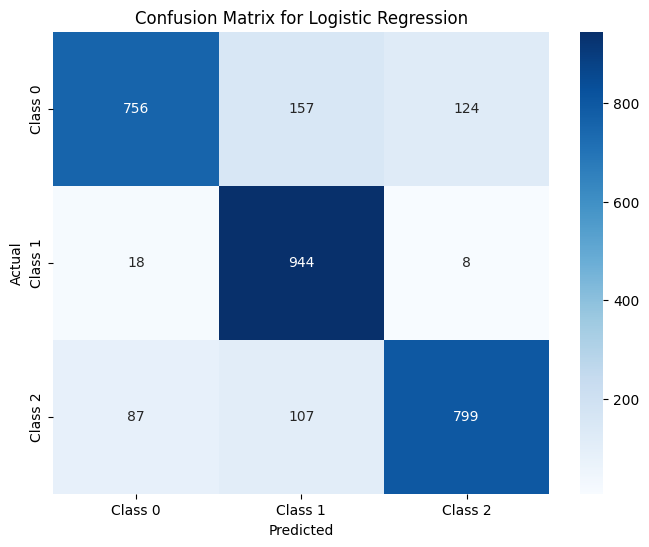

Naive Bayes Accuracy: 0.833
Naive Bayes Confusion Matrix:
[[756 157 124]
 [ 18 944   8]
 [ 87 107 799]]


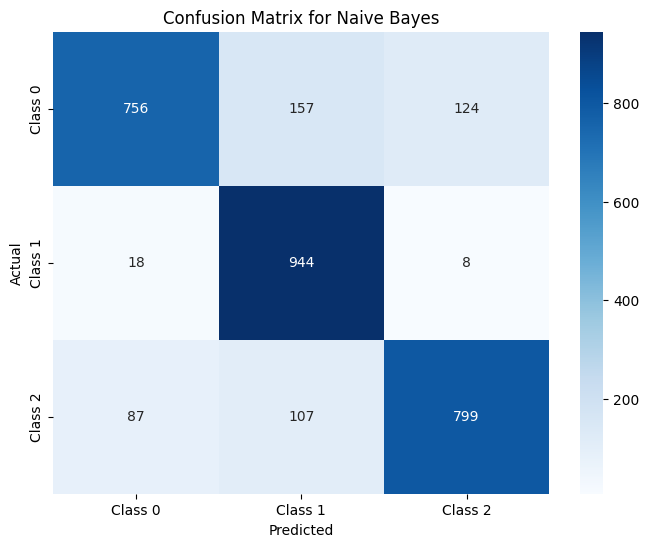

KNN Accuracy: 0.833
KNN Confusion Matrix:
[[756 157 124]
 [ 18 944   8]
 [ 87 107 799]]


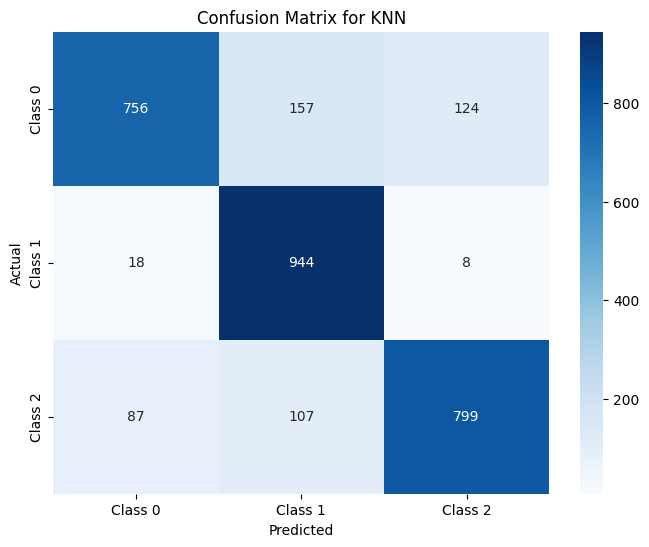

SVC Accuracy: 0.833
SVC Confusion Matrix:
[[756 157 124]
 [ 18 944   8]
 [ 87 107 799]]


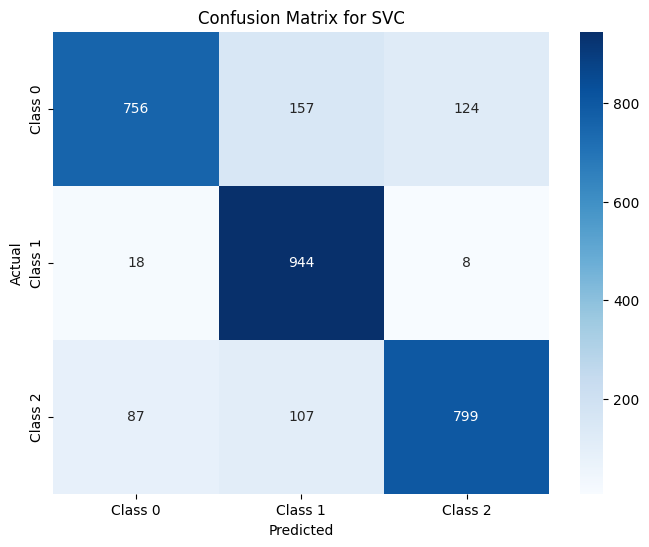

LGBM Accuracy: 0.833
LGBM Confusion Matrix:
[[756 157 124]
 [ 18 944   8]
 [ 87 107 799]]


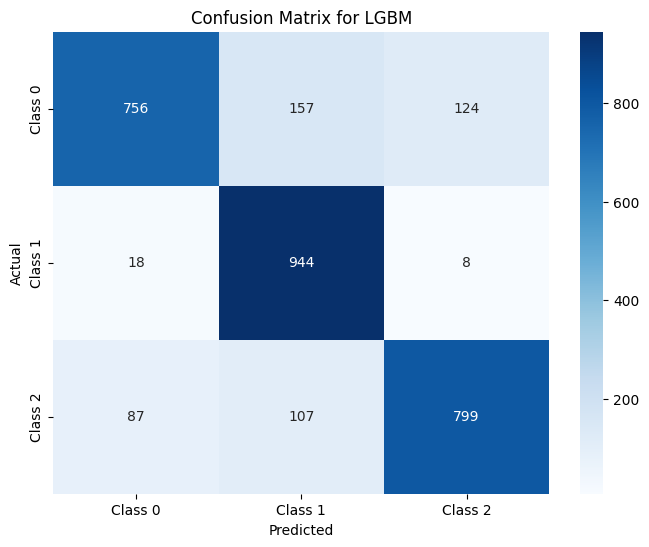

In [ ]:
import joblib
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

saved_models = {}

# Save the vectorizer
vectorizer_filename = 'vectorizer.pkl'
joblib.dump(vectorizer, vectorizer_filename)

# Print the filenames of the saved models and vectorizer
print("Saved models:")
print(saved_models)
print("Saved vectorizer:", vectorizer_filename)

#Saving the models...
for name, model in models.items():
    # Save the trained model
    model_filename = f'{name}_model.pkl'
    joblib.dump(model, model_filename)
    saved_models[name] = model_filename

    # Calculate confusion matrix
    cm = confusion_matrix(Y_test, predictions)

    print(f'{name} Accuracy: {accuracy}')
    print(f'{name} Confusion Matrix:')
    print(cm)

    # Plot confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', xticklabels=['Class 0', 'Class 1', 'Class 2'], yticklabels=['Class 0', 'Class 1', 'Class 2'])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f'Confusion Matrix for {name}')
    plt.show()

In [ ]:
predict('Hello')

NameError: ignored

In [ ]:
aimport gensim
from gensim import corpora

#dictionary = corpora.Dictionary(' '.join(df['tweet P'].astype(str)))
#tweet_term_matrix = [dictionary.doc2bow(tweet) for tweet in str(' '.join(df['tweet P'].astype(str)))]

# Assuming 'df' is your DataFrame and 'tweet' is the column with tweets
df['tweet_tokens'] = df['tweet P'].apply(lambda x: x.split())

# Create the Dictionary
dictionary = corpora.Dictionary(df['tweet_tokens'])

# Create the Corpus
corpus = [dictionary.doc2bow(text) for text in df['tweet_tokens']]

# Creating the object for LDA model using gensim library
Lda = gensim.models.ldamodel.LdaModel

# Running and Training LDA model on the document term matrix.
ldamodel = Lda(corpus, num_topics=2, id2word = dictionary, passes=15)


In [ ]:
def get_dominant_topic(ldamodel, corpus, texts):
    # Initialize dataframe
    dominant_topic_df = pd.DataFrame()

    # Get main topic in each document
    for i, row in enumerate(ldamodel[corpus]):
        row = sorted(row, key=lambda x: (x[1]), reverse=True)

        # Get the dominant topic, percent contribution and keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                dominant_topic_df = dominant_topic_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
            else:
                break
    dominant_topic_df.columns = ['Dominant_Topic', 'Percent_Contribution', 'Topic_Keywords']

    # Add original text to the end of the output
    contents = pd.Series(texts)
    dominant_topic_df = pd.concat([dominant_topic_df, contents], axis=1)
    return(dominant_topic_df)


In [ ]:
print(ldamodel.print_topics(num_topics=10, num_words=3))

[(4, '0.039*"thanks" + 0.029*"moment" + 0.022*"everything"'), (1, '0.045*"blog" + 0.038*"blessed" + 0.036*"silver"'), (15, '0.047*"morning" + 0.043*"work" + 0.036*"right"'), (7, '0.091*"day" + 0.084*"happy" + 0.048*"father\'s"'), (16, '0.034*"trump" + 0.025*"thought" + 0.022*"child"'), (6, '0.093*"time" + 0.086*"You" + 0.040*"take"'), (19, '0.050*"want" + 0.038*"know" + 0.032*"bull"'), (9, '0.161*"day" + 0.036*"today" + 0.019*"made"'), (18, '0.068*"i\'m" + 0.037*"healthy" + 0.034*"going"'), (14, '0.054*"good" + 0.034*"always" + 0.031*"night"')]


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

# create the transform
vectorizer = CountVectorizer()

# tokenize and build vocab
vectorizer.fit(df['LS'])

# summarize
print(vectorizer.vocabulary_)

# encode document
vector = vectorizer.transform(df['LS'])

# summarize encoded vector
print(vector.shape)
print(vector.toarray())

{'know': 3360, 'listenin': 3540, 'bad': 451, 'habit': 2634, 'earlier': 1818, 'start': 5768, 'freakin': 2293, 'part': 4494, 'layin': 3450, 'in': 3041, 'bed': 551, 'headach': 2729, 'ughhhhwaitin': 6479, 'call': 930, 'funer': 2348, 'ceremonygloomi': 1026, 'friday': 2310, 'want': 6712, 'hang': 2678, 'friend': 2314, 'soon': 5635, 'trade': 6306, 'someon': 5622, 'houston': 2910, 'ticket': 6178, 'one': 4336, 'will': 6870, 'reping': 5044, 'go': 2478, 'prom': 4817, 'becaus': 545, 'bf': 607, 'like': 3519, 'sleep': 5532, 'im': 3019, 'not': 4218, 'think': 6122, 'old': 4321, 'he': 2727, 'marri': 3737, 'now': 4234, 'damn': 1458, 'scandal': 5251, 'hmmm': 2833, 'charlen': 1056, 'love': 3622, 'miss': 3911, 'sorri': 5653, 'least': 3465, 'cant': 955, 'fall': 2073, 'asleep': 348, 'choke': 1107, 'retain': 5075, 'ugh': 6473, 'beat': 536, 'stupid': 5857, 'song': 5629, 'get': 2418, 'next': 4137, 'rude': 5164, 'you': 7060, 'watch': 6740, 'hill': 2814, 'london': 3579, 'realis': 4950, 'tourtur': 6296, 'week': 677

In [ ]:
# Evaluating the accuracy of the models

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

models = {
    'Logistic Regression': LogisticRegression(),
    'Naive Bayes': MultinomialNB(),
    'KNN': KNeighborsClassifier(),
    'SVC': SVC(),
    'LGBM': LGBMClassifier(),
#     'XGBoost': XGBClassifier()
}

for name, model in models.items():
    model.fit(X_train_vectorized, Y_train)
    predictions = model.predict(X_test_vectorized)
    accuracy = accuracy_score(Y_test, predictions)
    print(f'{name} Accuracy: {accuracy}')

In [ ]:
# Transforms each text in texts to a sequence of integers. Only top num_words-1 most frequent words will be taken into account.
encoded_train = t.texts_to_sequences(X_train)
encoded_test = t.texts_to_sequences(X_test)
print(encoded_train[0:2])

[[25, 2450, 891, 1665, 273, 612, 292, 2451, 2452], [403, 1271, 1666, 362, 1, 3, 323, 2453, 237, 2454, 77, 1667, 2455, 60, 39, 64]]


In [ ]:
# pad_sequences is used to ensure that all sequences in a list have the same length. By default this is done by padding 0 in the beginning of each sequence until each sequence has the same length as the longest sequence.

max_length = 8
padded_train = pad_sequences(encoded_train, maxlen=max_length, padding='post')
padded_test = pad_sequences(encoded_test, maxlen=max_length, padding='post')
print(padded_train)

[[2450  891 1665 ...  292 2451 2452]
 [ 237 2454   77 ...   60   39   64]
 [ 678   60   39 ... 2456  550 2457]
 ...
 [1050  495 6289 ... 6290 2420   52]
 [   2  113  127 ...    0    0    0]
 [ 327   70  119 ... 1642   37   18]]


In [ ]:
# Model is compiled and summary generated

vocab_size = len(t.word_index) + 1

# define the model
model = Sequential()
model.add(Embedding(vocab_size, 24, input_length=max_length)) #Victorizer (Dictionary)
model.add(SimpleRNN(24, return_sequences=False)) #Our Model
model.add(Dense(1, activation='sigmoid'))

# compile the model
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

# summarize the model
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 8, 24)             151008    
                                                                 
 simple_rnn (SimpleRNN)      (None, 24)                1176      
                                                                 
 dense (Dense)               (None, 1)                 25        
                                                                 
Total params: 152209 (594.57 KB)
Trainable params: 152209 (594.57 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


In [ ]:
# Model is trained and validated for test dataset with 50 epochs.
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10)

# fit the model
model.fit(x=padded_train,
         y=y_train,
         epochs=50,
         validation_data=(padded_test, y_test), verbose=1,
         callbacks=[early_stop]
         )

Epoch 1/50
125/125 [==============================] - 14s 66ms/step - loss: nan - accuracy: 0.0047 - val_loss: nan - val_accuracy: 0.0020
Epoch 2/50
125/125 [==============================] - 2s 17ms/step - loss: nan - accuracy: 0.0050 - val_loss: nan - val_accuracy: 0.0020
Epoch 3/50
125/125 [==============================] - 2s 12ms/step - loss: nan - accuracy: 0.0050 - val_loss: nan - val_accuracy: 0.0020
Epoch 4/50
125/125 [==============================] - 1s 10ms/step - loss: nan - accuracy: 0.0050 - val_loss: nan - val_accuracy: 0.0020
Epoch 5/50
125/125 [==============================] - 1s 10ms/step - loss: nan - accuracy: 0.0050 - val_loss: nan - val_accuracy: 0.0020
Epoch 6/50
125/125 [==============================] - 1s 10ms/step - loss: nan - accuracy: 0.0050 - val_loss: nan - val_accuracy: 0.0020
Epoch 7/50
125/125 [==============================] - 1s 11ms/step - loss: nan - accuracy: 0.0050 - val_loss: nan - val_accuracy: 0.0020
Epoch 8/50
125/125 [====================

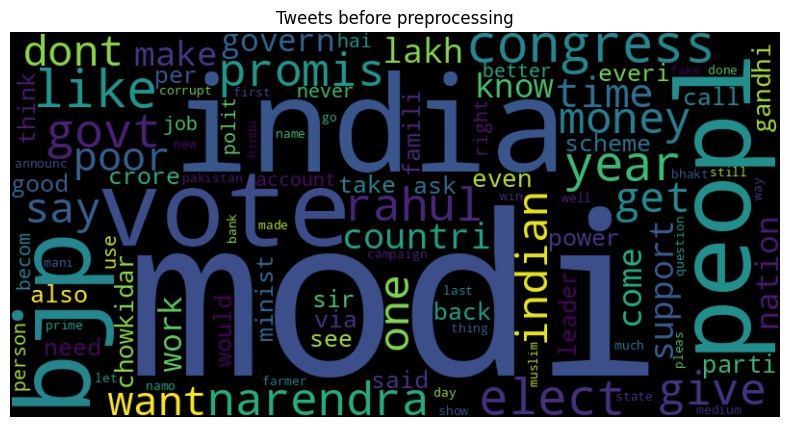

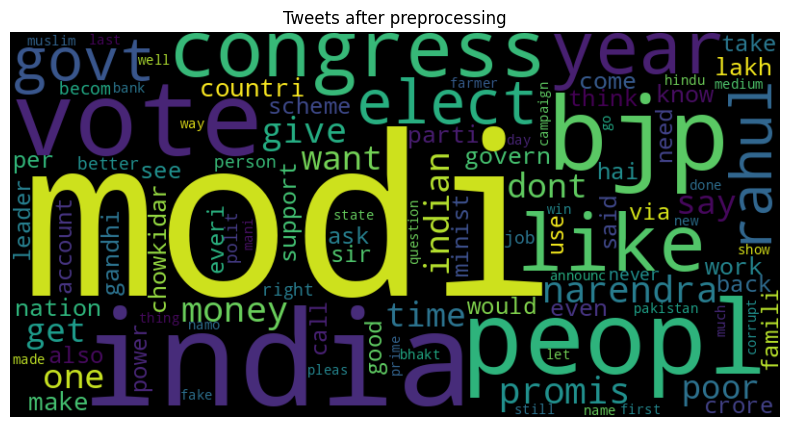

In [ ]:
# Plot a word cloud for the most used words
from collections import Counter
from wordcloud import WordCloud
import matplotlib.pyplot as plt

cnt = Counter()
for text in df["LS"].values:
    for word in text.split():
        cnt[word] += 1
#cnt.most_common(150)

# Assuming words is your list of most common words
words = dict(cnt.most_common(100))

# Generate a word cloud image
wordcloud = WordCloud(width=800, height=400).generate_from_frequencies(words)

# Display the generated image
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Tweets before preprocessing')
plt.axis("off")
plt.show()

cntP = Counter()
for text in df["LS"].values:
    for word in text.split():
        cntP[word] += 1
words = dict(cntP.most_common(100))
wordcloud = WordCloud(width=800, height=400).generate_from_frequencies(words)
# Display the generated image
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Tweets after preprocessing')
plt.axis("off")
plt.show()


